In [1210]:
library(readr)

In [1211]:
df <- read.csv('CarPrice_Assignment.csv')

In [1212]:
head(df)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,⋯,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,⋯,<int>,<chr>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<dbl>
1,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,⋯,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
2,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,⋯,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
3,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,⋯,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
4,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,⋯,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
5,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,⋯,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
6,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,⋯,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


In [1213]:
# To find the shape of the data set
dim(df)

[1] 205  26

In [1214]:
# To find missing values
data.frame(colSums(is.na(df)))

,colSums.is.na.df..
,<dbl>
car_ID,0
symboling,0
CarName,0
fueltype,0
aspiration,0
doornumber,0
carbody,0
drivewheel,0
enginelocation,0


In [1215]:
# structure of data set
str(df)

'data.frame':	205 obs. of  26 variables:
 $ car_ID          : int  1 2 3 4 5 6 7 8 9 10 ...
 $ symboling       : int  3 3 1 2 2 2 1 1 1 0 ...
 $ CarName         : chr  "alfa-romero giulia" "alfa-romero stelvio" "alfa-romero Quadrifoglio" "audi 100 ls" ...
 $ fueltype        : chr  "gas" "gas" "gas" "gas" ...
 $ aspiration      : chr  "std" "std" "std" "std" ...
 $ doornumber      : chr  "two" "two" "two" "four" ...
 $ carbody         : chr  "convertible" "convertible" "hatchback" "sedan" ...
 $ drivewheel      : chr  "rwd" "rwd" "rwd" "fwd" ...
 $ enginelocation  : chr  "front" "front" "front" "front" ...
 $ wheelbase       : num  88.6 88.6 94.5 99.8 99.4 ...
 $ carlength       : num  169 169 171 177 177 ...
 $ carwidth        : num  64.1 64.1 65.5 66.2 66.4 66.3 71.4 71.4 71.4 67.9 ...
 $ carheight       : num  48.8 48.8 52.4 54.3 54.3 53.1 55.7 55.7 55.9 52 ...
 $ curbweight      : int  2548 2548 2823 2337 2824 2507 2844 2954 3086 3053 ...
 $ enginetype      : chr  "dohc" "dohc" "ohc

In [1216]:
# summary of the data set
summary(df)

     car_ID      symboling         CarName            fueltype        
 Min.   :  1   Min.   :-2.0000   Length:205         Length:205        
 1st Qu.: 52   1st Qu.: 0.0000   Class :character   Class :character  
 Median :103   Median : 1.0000   Mode  :character   Mode  :character  
 Mean   :103   Mean   : 0.8341                                        
 3rd Qu.:154   3rd Qu.: 2.0000                                        
 Max.   :205   Max.   : 3.0000                                        
  aspiration         doornumber          carbody           drivewheel       
 Length:205         Length:205         Length:205         Length:205        
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                         

In [1217]:
# Selecting only a few columns to work with
cols_to_select <- c("CarName","carbody","fueltype","carlength","cylindernumber","enginesize","curbweight","citympg","highwaympg","price")

In [1218]:
df_new <- df[,cols_to_select]

In [1219]:
head(df_new)

,CarName,carbody,fueltype,carlength,cylindernumber,enginesize,curbweight,citympg,highwaympg,price
,<chr>,<chr>,<chr>,<dbl>,<chr>,<int>,<int>,<int>,<int>,<dbl>
1,alfa-romero giulia,convertible,gas,168.8,four,130,2548,21,27,13495
2,alfa-romero stelvio,convertible,gas,168.8,four,130,2548,21,27,16500
3,alfa-romero Quadrifoglio,hatchback,gas,171.2,six,152,2823,19,26,16500
4,audi 100 ls,sedan,gas,176.6,four,109,2337,24,30,13950
5,audi 100ls,sedan,gas,176.6,five,136,2824,18,22,17450
6,audi fox,sedan,gas,177.3,five,136,2507,19,25,15250


In [1220]:
# getting the value counts of the column.
cylinder_counts <- table(df_new$cylindernumber)
cylinder_counts


 eight   five   four    six  three twelve    two 
     5     11    159     24      1      1      4 

In [1221]:
# creating a mapping object to map to the numerical equivalents of the cylinder_counts
mapping <- c("eight" = 8, "five" = 5, "four" = 4, "six" = 6, "three" = 3, "twelve" = 12, "two" = 2)

In [1222]:
# replacing the column with its neumerical equivalents
df_new$cylindernumber = mapping[df_new$cylindernumber]

In [1223]:
head(df_new)

,CarName,carbody,fueltype,carlength,cylindernumber,enginesize,curbweight,citympg,highwaympg,price
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<dbl>
1,alfa-romero giulia,convertible,gas,168.8,4,130,2548,21,27,13495
2,alfa-romero stelvio,convertible,gas,168.8,4,130,2548,21,27,16500
3,alfa-romero Quadrifoglio,hatchback,gas,171.2,6,152,2823,19,26,16500
4,audi 100 ls,sedan,gas,176.6,4,109,2337,24,30,13950
5,audi 100ls,sedan,gas,176.6,5,136,2824,18,22,17450
6,audi fox,sedan,gas,177.3,5,136,2507,19,25,15250


In [1224]:
summary(df_new) # None of them has 0 as the Minimum value. So there are no missing values technically.

   CarName            carbody            fueltype           carlength    
 Length:205         Length:205         Length:205         Min.   :141.1  
 Class :character   Class :character   Class :character   1st Qu.:166.3  
 Mode  :character   Mode  :character   Mode  :character   Median :173.2  
                                                          Mean   :174.0  
                                                          3rd Qu.:183.1  
                                                          Max.   :208.1  
 cylindernumber    enginesize      curbweight      citympg        highwaympg   
 Min.   : 2.00   Min.   : 61.0   Min.   :1488   Min.   :13.00   Min.   :16.00  
 1st Qu.: 4.00   1st Qu.: 97.0   1st Qu.:2145   1st Qu.:19.00   1st Qu.:25.00  
 Median : 4.00   Median :120.0   Median :2414   Median :24.00   Median :30.00  
 Mean   : 4.38   Mean   :126.9   Mean   :2556   Mean   :25.22   Mean   :30.75  
 3rd Qu.: 4.00   3rd Qu.:141.0   3rd Qu.:2935   3rd Qu.:30.00   3rd Qu.:34.00  
 M

In [1225]:
install.packages('tidyverse')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [1226]:
install.packages("purrr")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [1227]:
# getting the counts of each of the column.

library(tidyverse)
library(purrr)
library(ggplot2)

options(
  repr.plot.width = 12,
  repr.plot.height = 12
)

plot <- df_new %>%
  keep(is.numeric) %>%
  gather() %>% # gathering all numerical columns key-value pairs into long format.
  ggplot(aes(value))+
    facet_wrap(~ key, scales = "free") +
    geom_histogram(bins = 12, color="black", fill ="#CFB87C", alpha = 0.8) +
    theme_bw()

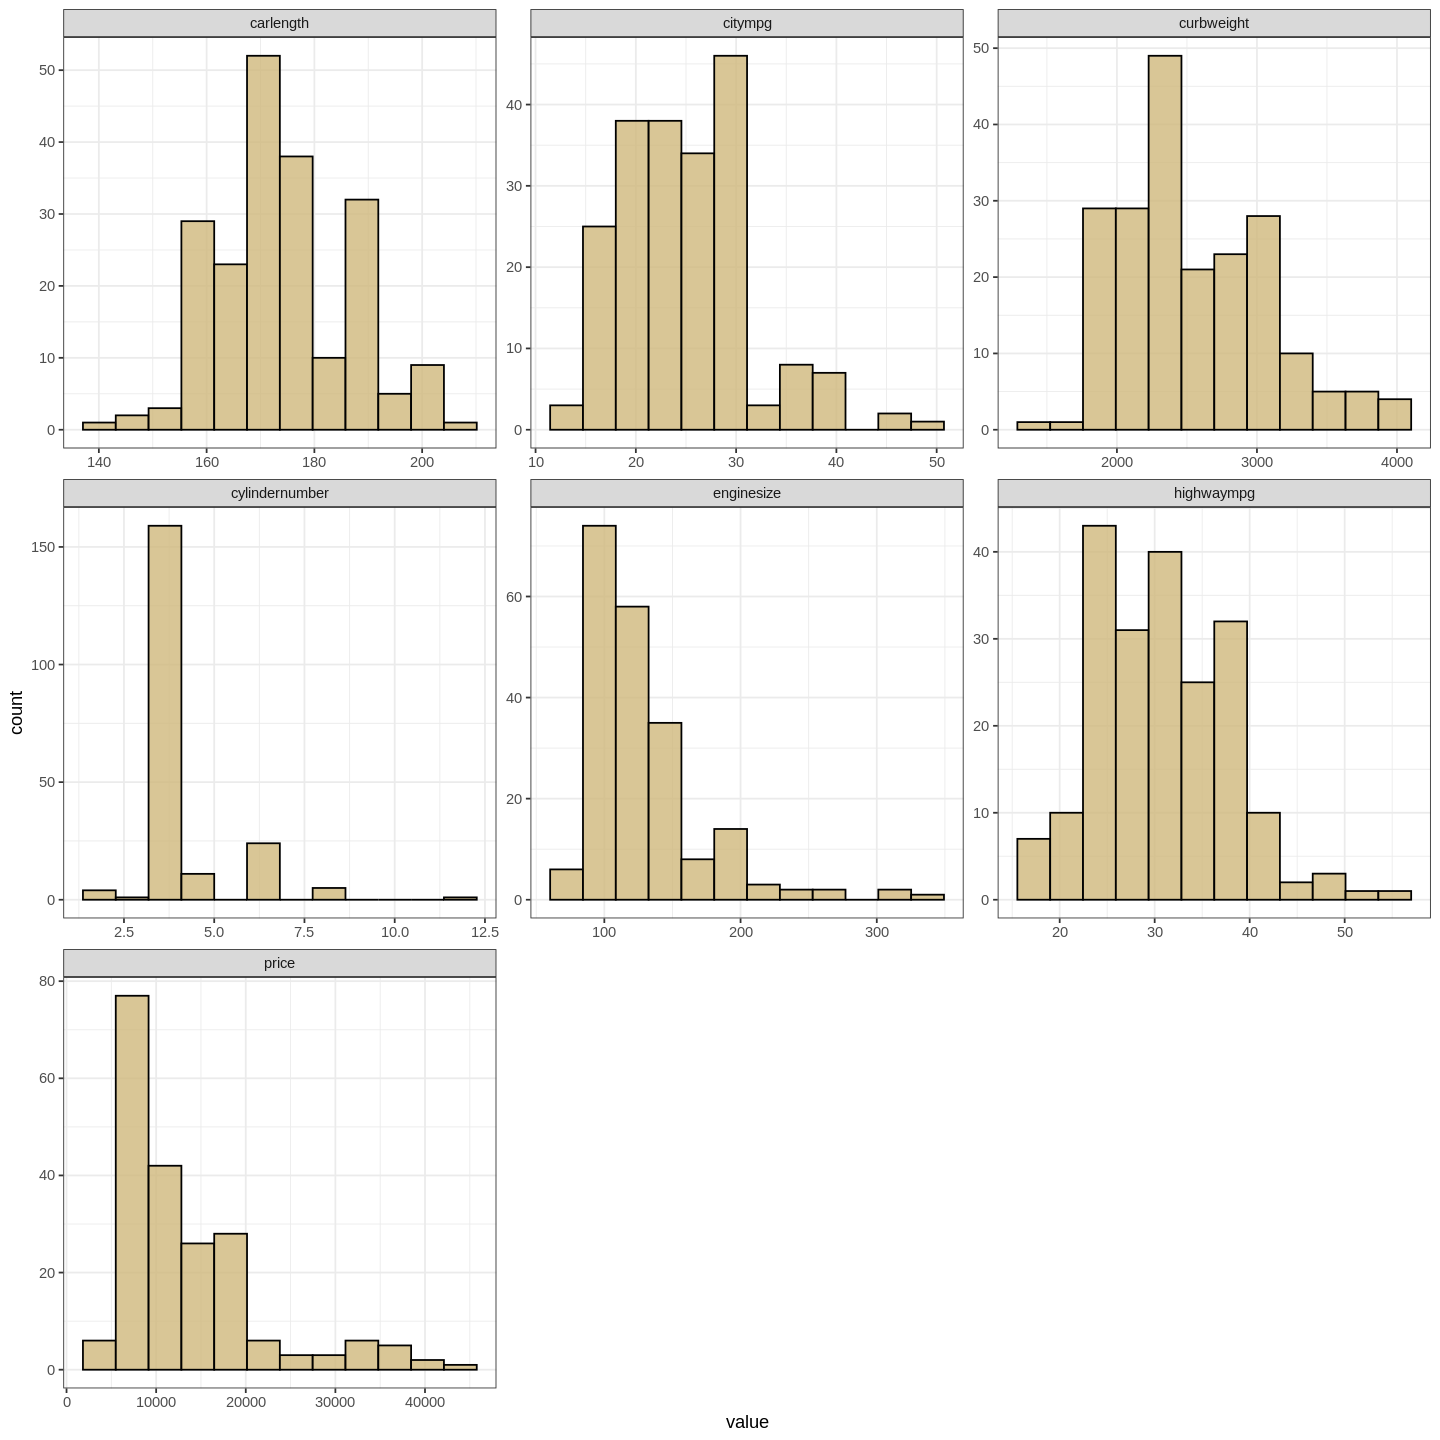

In [1228]:
plot

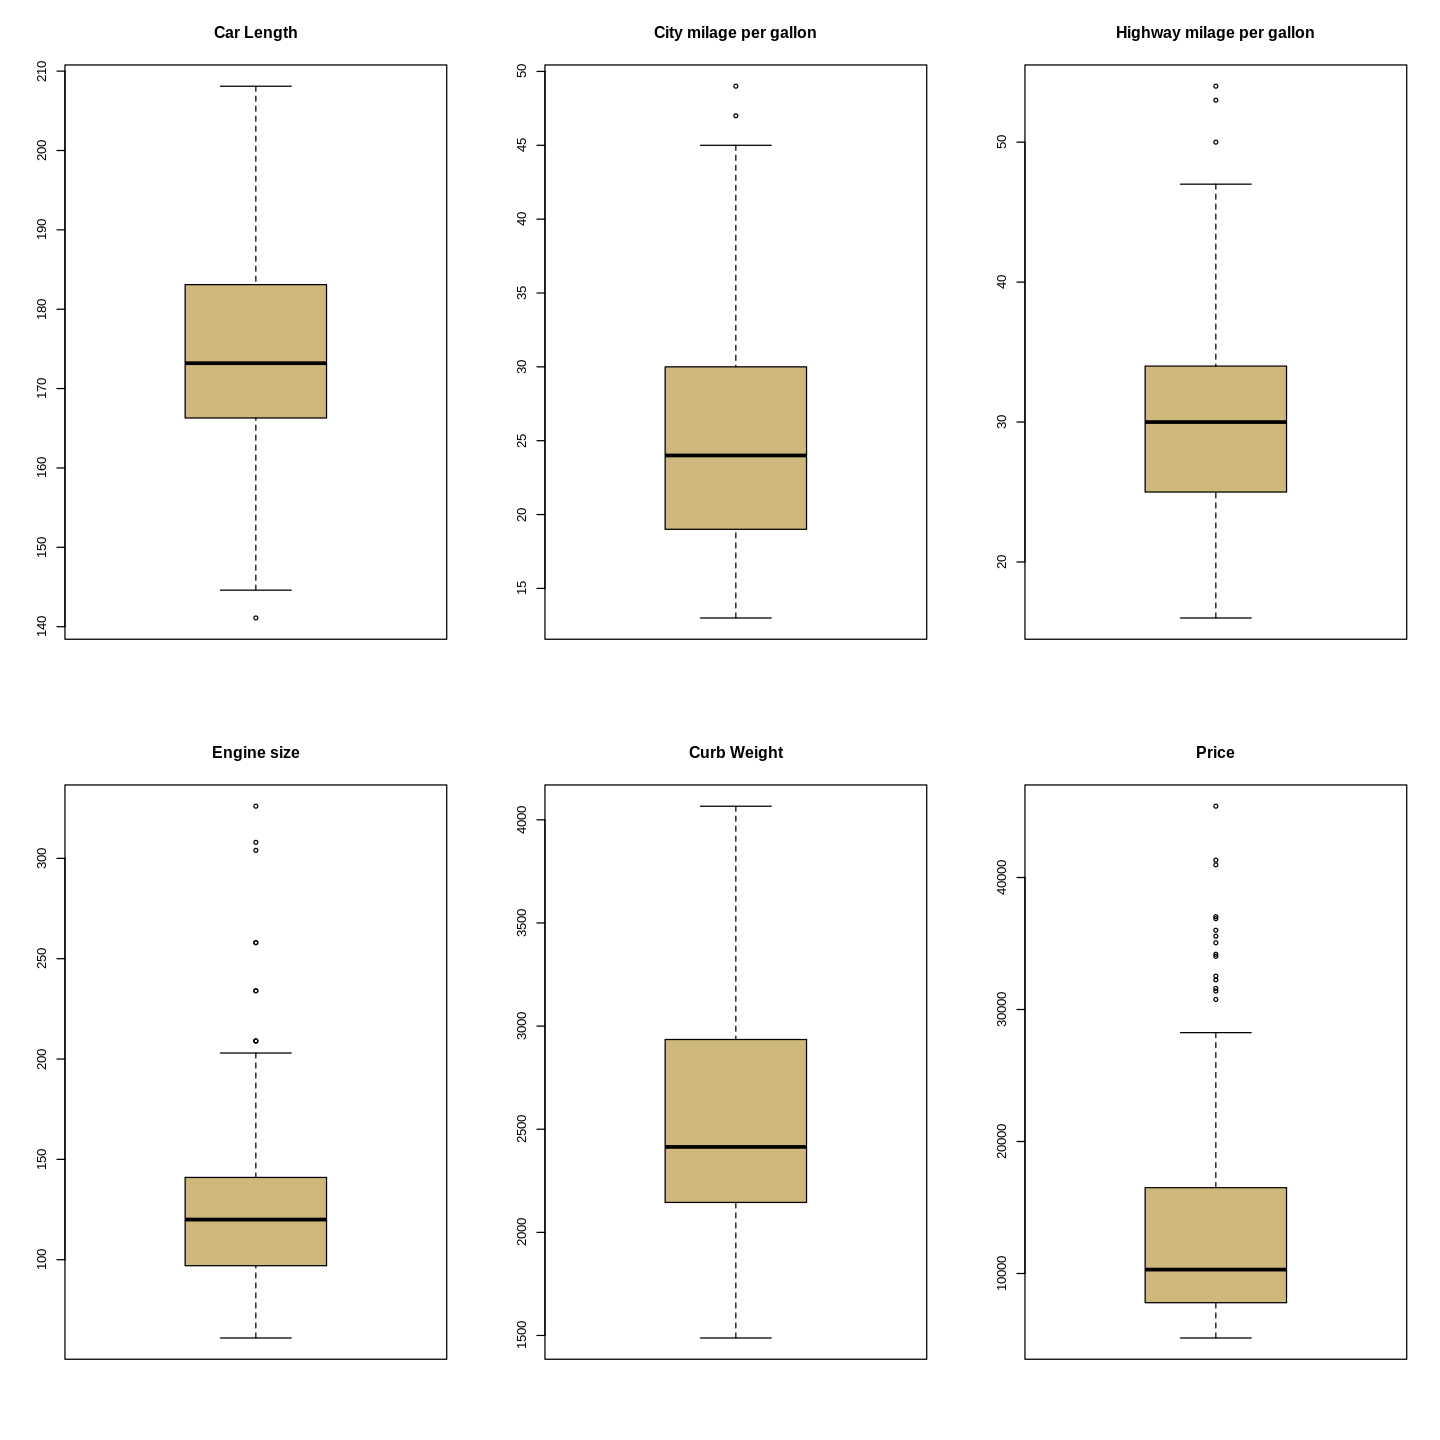

In [1229]:
# To visualize if the columns (numerical) has any outliers.
par(mfrow = c(2,3))

boxplot(df_new$carlength, main = "Car Length", col="#CFB87C")
boxplot(df_new$citympg, main = "City milage per gallon", col="#CFB87C")
boxplot(df_new$highwaympg, main = "Highway milage per gallon", col="#CFB87C")
boxplot(df_new$enginesize, main = "Engine size", col="#CFB87C")
boxplot(df_new$curbweight, main = "Curb Weight", col="#CFB87C")
boxplot(df_new$price, main = "Price", col="#CFB87C")

# There are outliers in many of the columns except carlength and curb weight.

In [1230]:
# getting only numeric columns
numeric_cols <- sapply(df_new, is.numeric)

In [1231]:
# calculating IQR to detect the outliers
Q1 <- apply(df_new[, numeric_cols], 2, quantile, probs = 0.25)
Q3 <- apply(df_new[, numeric_cols], 2, quantile, probs = 0.75)
IQR <- Q3 - Q1
lower_bound <- Q1 - 1.5 * IQR
upper_bound <- Q3 + 1.5 * IQR

In [1232]:
# removing outliers
df_clean <- df_new
for (col in names(df_clean)[numeric_cols]) {
  df_clean <- df_clean[df_clean[[col]] >= lower_bound[col] & df_clean[[col]] <= upper_bound[col], ]
}

In [1233]:
dim(df_clean)

[1] 157  10

In [1234]:
install.packages("corrplot")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [1235]:
df_clean$cylindernumber

[1] 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 [38] 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 [75] 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
[112] 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
[149] 4 4 4 4 4 4 4 4 4

In [1236]:
df_clean <- df_clean[, -which(names(df_clean) == "cylindernumber")]

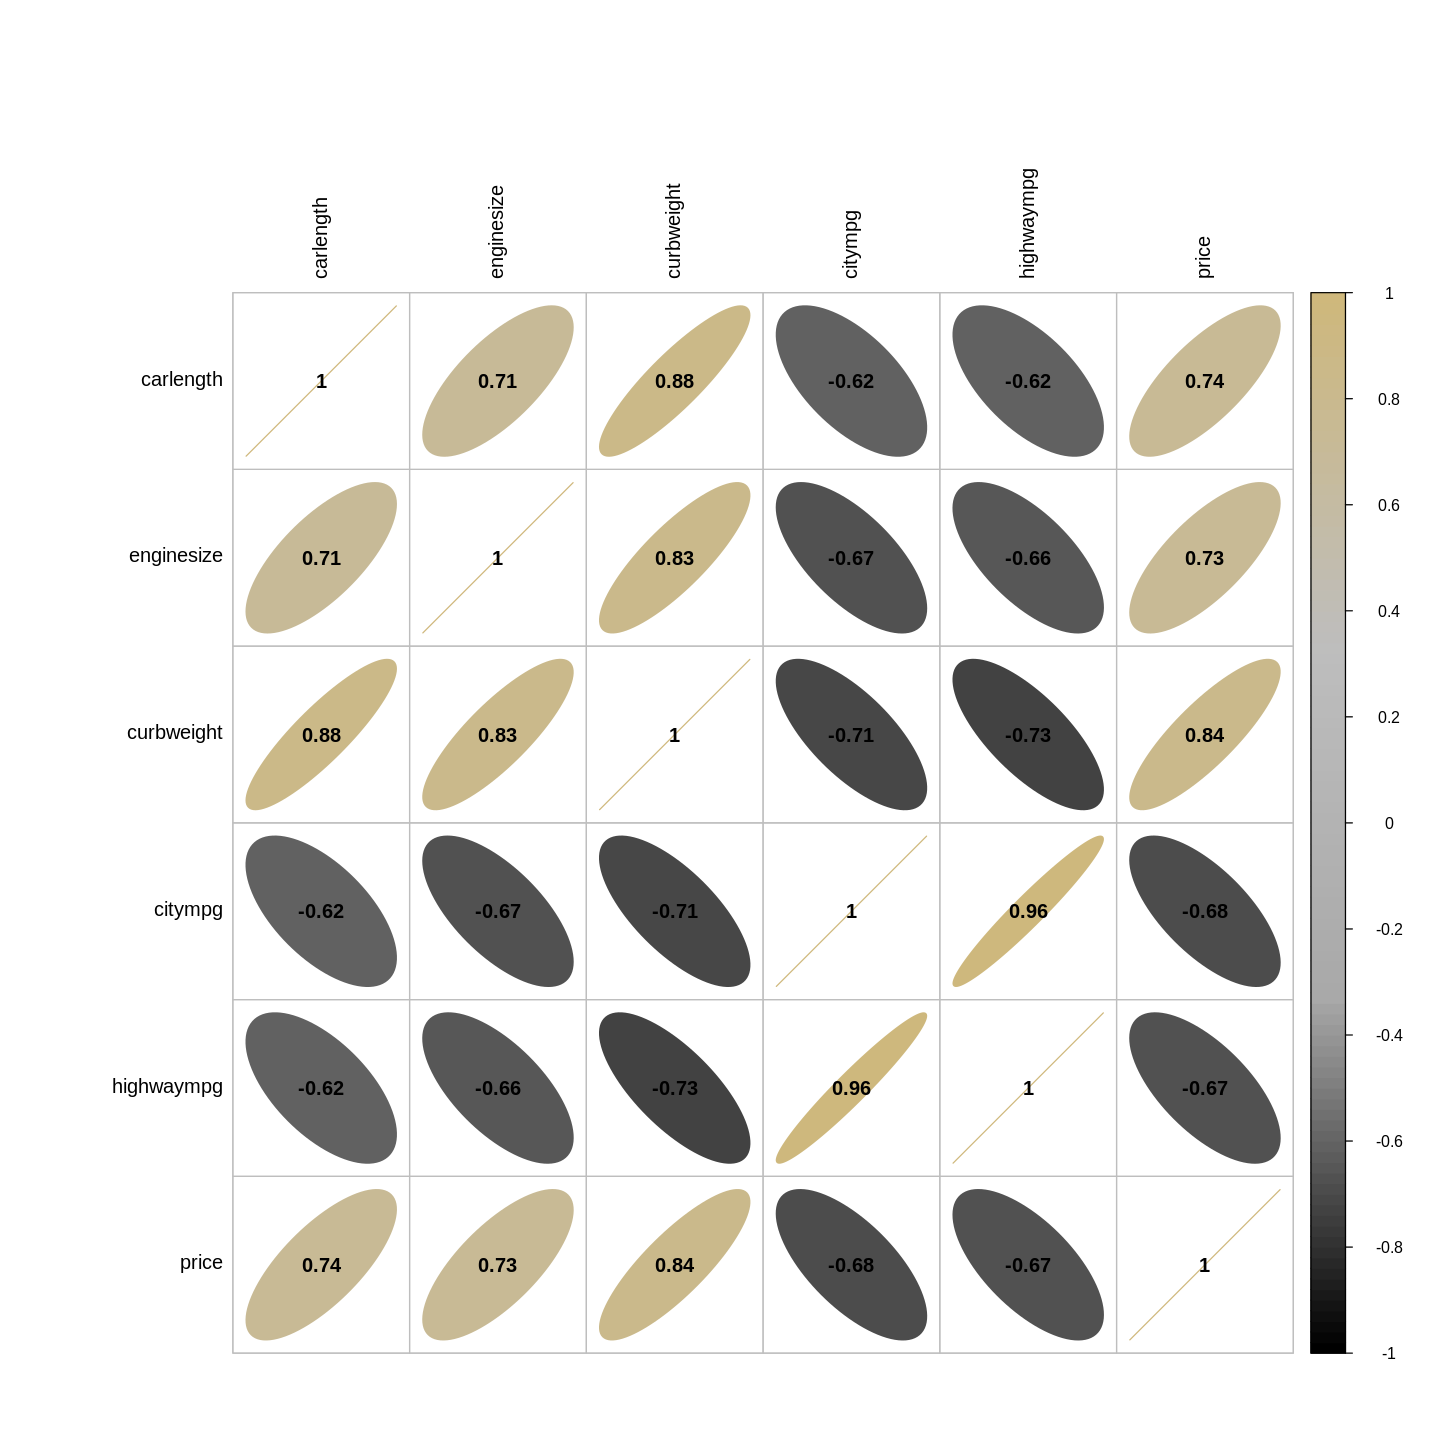

In [1237]:

library(corrplot)

col4 = colorRampPalette(c("black", "darkgrey", "grey","#CFB87C"))
corrplot(cor(df_clean %>% select_if(is.numeric)), method = "ellipse",
         col = col4(100),  addCoef.col = "black", tl.col = "black")

We can see that some of the variables are strongly correlated to the target variable. But we can not directly donclude with the help of this correlation plot. So we have to draw pair plots to check if there is any non-linear trend or relationship between them.

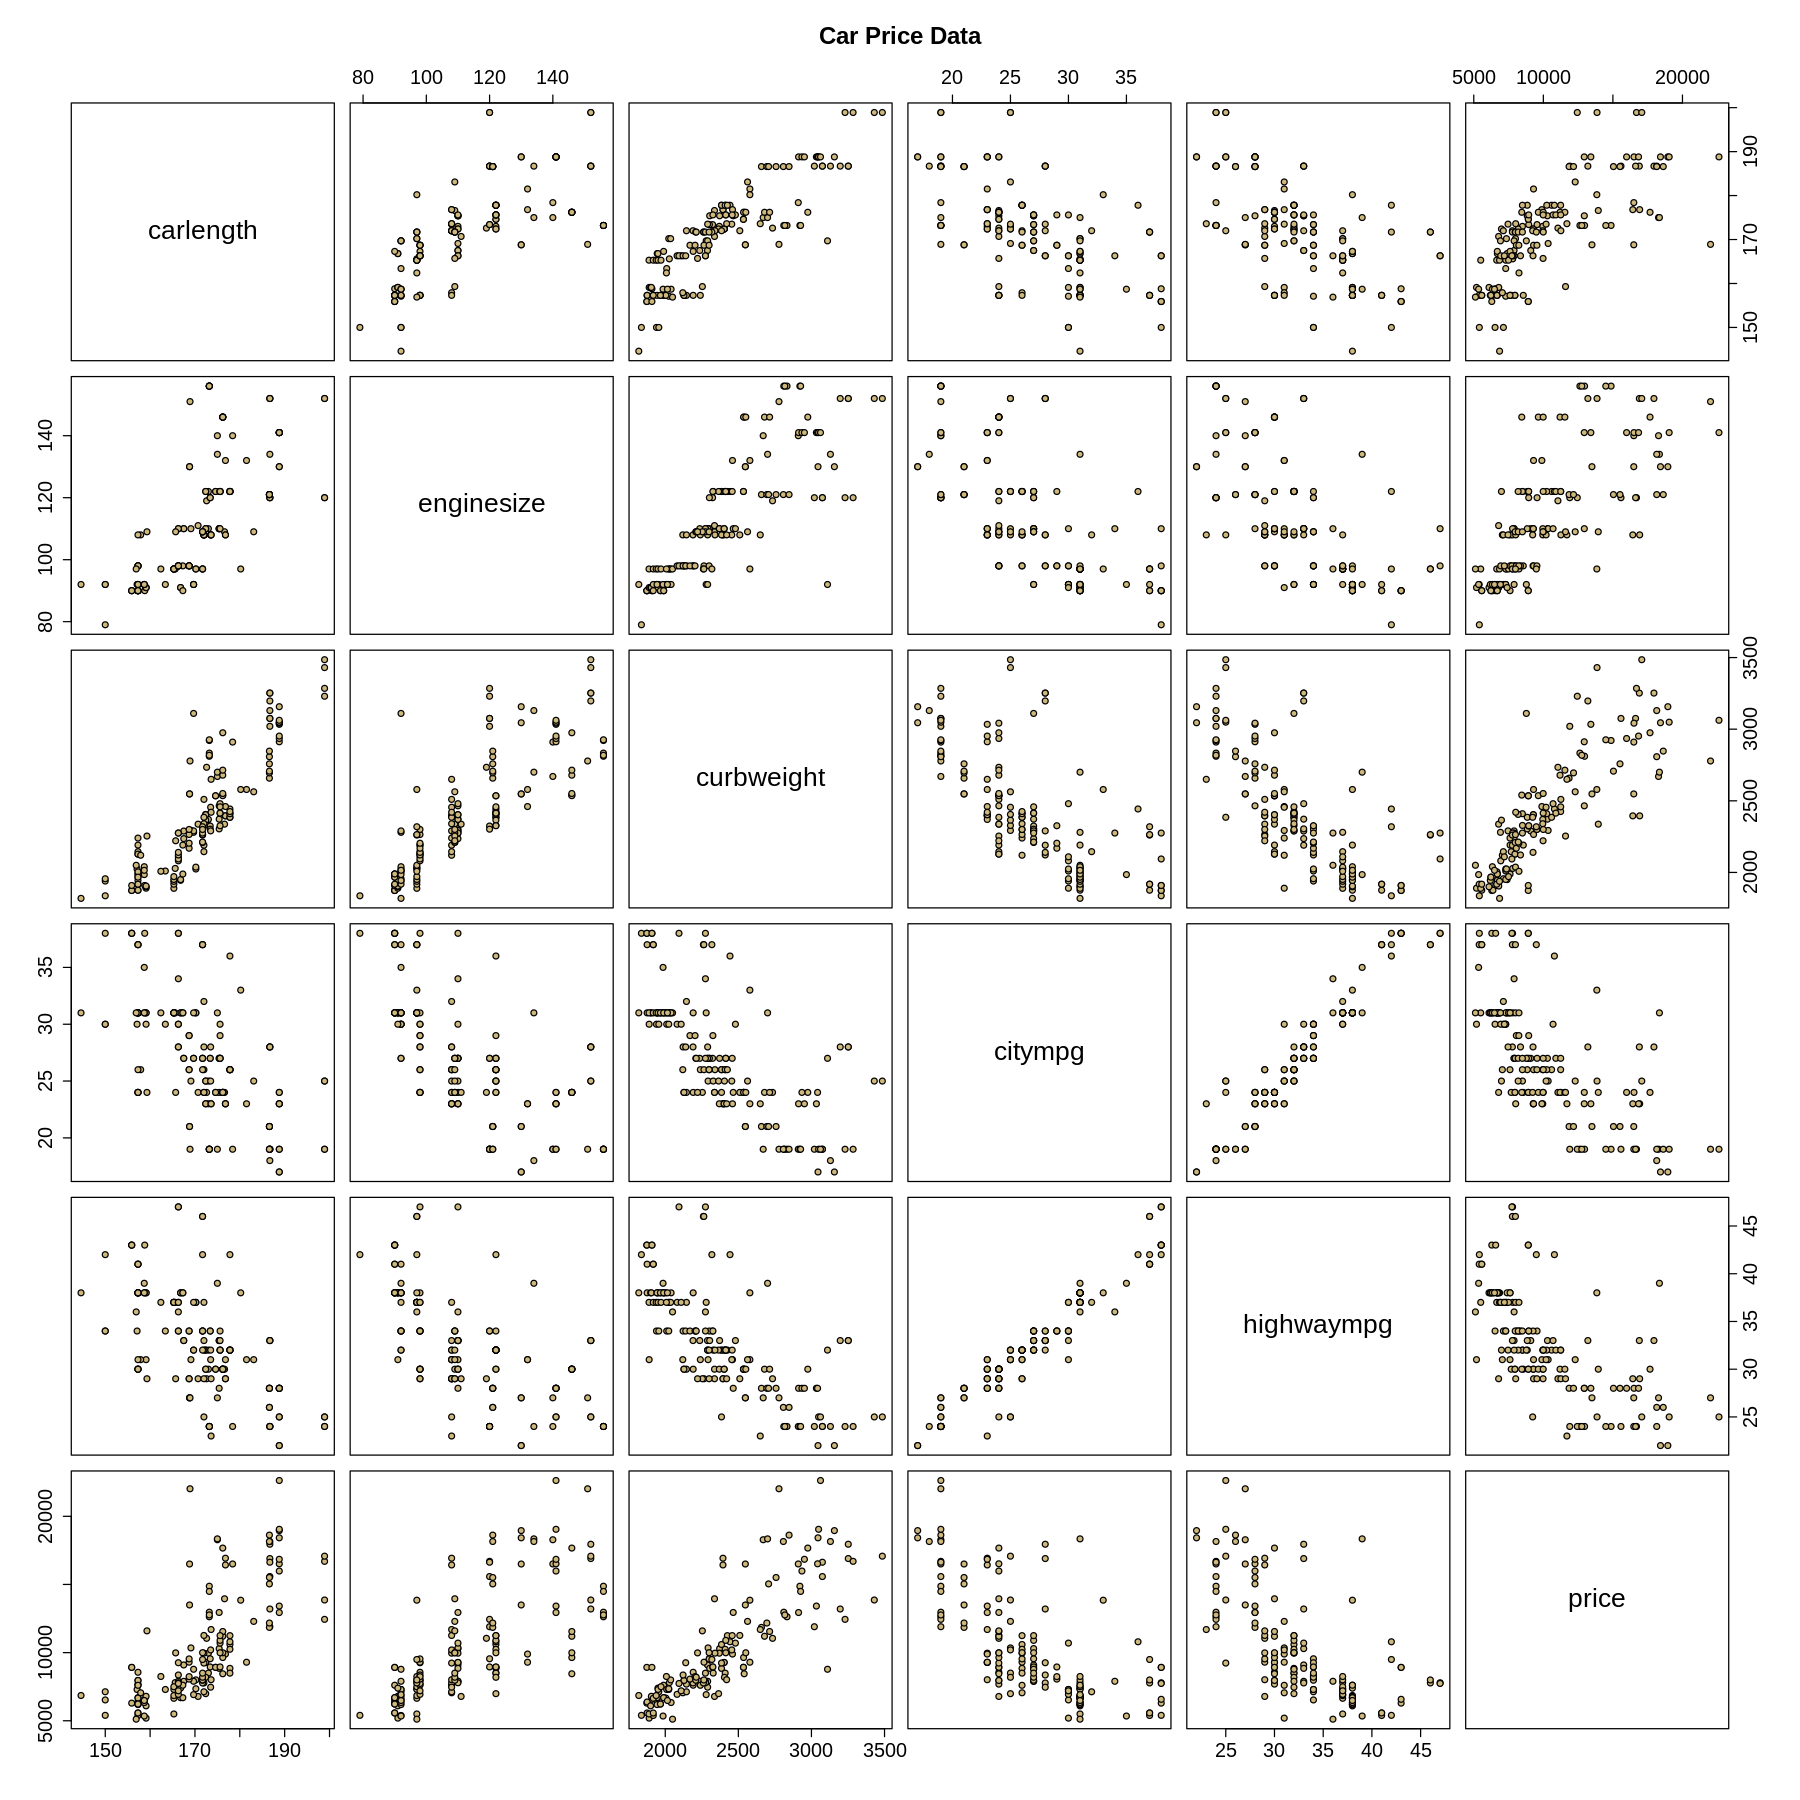

In [1238]:
# Drawing pair plots

options(
  repr.plot.width = 15,  # Width of the plot
  repr.plot.height = 15   # Height of the plot
)


pairs(df_clean %>% select_if(is.numeric), main = "Car Price Data", pch = 21, bg=c("#CFB87C"), cex.labels = 2, cex.axis = 1.5)

From the above 2 plots we can see that there is strong correlation between highway mpg and city mpg. So, we should remove one of them. I am removing city mpg from the data set.

We can see that there is non linear relationship between price and carlength, curb weight.

There is negative correlation between price and citympg, highway mpg.This is an interesting insight.

In [1239]:
df_clean <- df_clean[, -which(names(df_clean) == "citympg")]

# Shapiro Wilk Test

In [1240]:
# Let us do a normality test (Shapiro Wilk Test for the price column)

# H0 : Price column's data is normally distributed
# HA : It is not distributed normally

test_results <- shapiro.test(df_clean$price)
test_results


	Shapiro-Wilk normality test

data:  df_clean$price
W = 0.89383, p-value = 3.28e-09


In [1241]:
# we can clearly see that p value is really small and hence we reject the null hypothesis.
# Therefore the data points in the price column are not distributed normally.

# Hypothesis Testing With Randomization.

H0 : There is no relationship between the price of a car and its fuel type. The variables price and fuel type are independent of each other.

HA : There is a significant relationship between the fuel type and the price of the car. It means the fuel type can affect the price of the car.

In [1242]:
head(df_clean)

,CarName,carbody,fueltype,carlength,enginesize,curbweight,highwaympg,price
,<chr>,<chr>,<chr>,<dbl>,<int>,<int>,<int>,<dbl>
1,alfa-romero giulia,convertible,gas,168.8,130,2548,27,13495
2,alfa-romero stelvio,convertible,gas,168.8,130,2548,27,16500
4,audi 100 ls,sedan,gas,176.6,109,2337,30,13950
11,bmw 320i,sedan,gas,176.8,108,2395,29,16430
12,bmw 320i,sedan,gas,176.8,108,2395,29,16925
20,chevrolet monte carlo,hatchback,gas,155.9,90,1874,43,6295


In [1243]:
obs_diff <- df_clean %>%
              filter(fueltype == 'diesel') %>%
              summarise(mean_price_diesel = mean(price)) %>%
              pull(mean_price_diesel) -
            df_clean %>%
              filter(fueltype == "gas") %>%
              summarise(mean_price_petrol = mean(price)) %>%
              pull(mean_price_petrol)

In [1244]:
obs_diff

[1] 2273.74

In [1245]:
no_of_times <- 25000

new_means <- numeric(no_of_times)

In [1246]:
new_means # empty vector with zeros. for storing the p values for every iteration

[1] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
   [37] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
   [73] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [109] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [145] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [181] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [217] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [253] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [289] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [325] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [361] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [397] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [433] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [469] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [505] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [541] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [577] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [613] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [649] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [685] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [721] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [757] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [793] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [829] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [865] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [901] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [937] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [973] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1009] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1045] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1081] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1117] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1153] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1189] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1225] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1261] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1297] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1333] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1369] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1405] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1441] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1477] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1513] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1549] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1585] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1621] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1657] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1693] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1729] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1765] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [18

In [1247]:
for(i in 1:no_of_times){
  fuel_type <- sample(df_clean$fueltype)

  new_gas_prices <- df_clean$price[fuel_type == 'gas']
  new_diesel_prices <- df_clean$price[fuel_type == 'diesel']
  new_means[i] <- mean(new_diesel_prices) - mean(new_gas_prices)
}

In [1248]:
head(new_means)

[1]   -80.31868 -1455.48027  -112.31469 -1513.82592   717.15035   701.70130

In [1249]:
p_val <- mean(new_means >= obs_diff)
p_val

[1] 0.02408

In [1250]:
options(
  repr.plot.width = 10,  # Width of the plot
  repr.plot.height = 10   # Height of the plot
)

p_value_hist_p <- ggplot() +
  geom_histogram(aes(x = new_means, y = ..density..), bins = 30, fill = "#CFB87C", color = "black") +
  geom_vline(xintercept = obs_diff, color = "red", linetype = "dashed", size = 1) +
  geom_text(aes(x = obs_diff, label = "Observed"), y = 0.2, color = "red", vjust = -1, size = 4) +
  labs(title = "Distribution of Permutation Test P-values",
       x = "P-value",
       y = "Density") +
  theme_minimal()


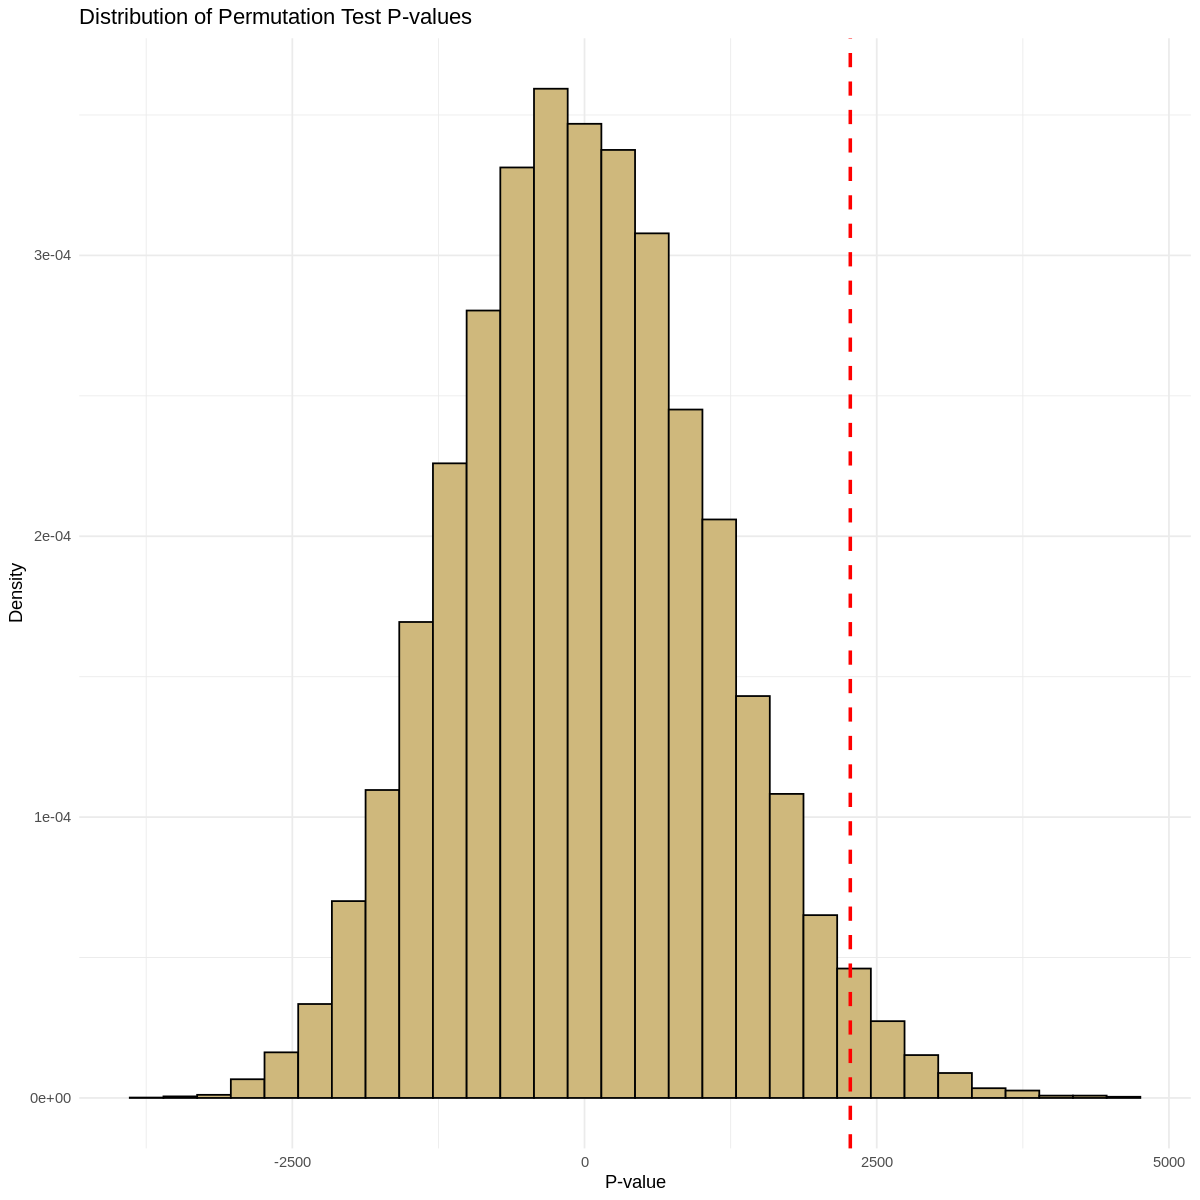

In [1251]:
p_value_hist_p

Since the obtained p value is < that 0.05 we reject the null hypothesis. We can also see this from the histogram. So we can conclude that the variables are not independent and there is significant relationship or statistic significance. The price of the car depends upon the type of fuel.

# Confidence Interval, Bootstrapping, Z test

In [1252]:
confidence_level <- 0.95

mean_price <- mean(df_clean$price)
sd_price <- sd(df_clean$price)
std_error <- sd_price / sqrt(length(df_clean$price))

In [1253]:
length(df_clean$price)

[1] 157

In [1254]:
mean_price

[1] 10330.3

In [1255]:
sd_price

[1] 3926.348

In [1256]:
3926.34773564665/ sqrt(157)

[1] 313.3567

In [1257]:
std_error

[1] 313.3567

In [1258]:
z_score <- qnorm((1+confidence_level) / 2, lower.tail = TRUE)

error_margin <- z_score * std_error

In [1259]:
z_score # correct theoretical value is 1.96 for 95% CI

[1] 1.959964

In [1260]:
error_margin

[1] 614.1678

In [1261]:
lower_bound <- mean_price - error_margin
upper_bound <- mean_price + error_margin

In [1262]:
cat('Confidence Interval is:',"\n")
cat('(', lower_bound, ',', upper_bound, ')')

Confidence Interval is: 
( 9716.132 , 10944.47 )

In [1263]:

lower_bound <- 9716.132
upper_bound <- 10944.47

sample_prices <- sample(df_clean$price, 1000, replace = TRUE)
prices_in_ci <- sum(sample_prices >= lower_bound & sample_prices <= upper_bound)
cat("Number of prices within the confidence interval:", prices_in_ci, "\n")


Number of prices within the confidence interval: 101 


Since the price column has lot of skewedness the Confidence Interval is not significant for z value. because Z and t assumes that column is normally distributed.

Hence only 11% of the samples are falling in the CI range. I think i should calculate the CI with bootstrapping because when we are iterating multiple times it attempts to make the column normal.

In [1264]:
set.seed(123)
num_bootstraps <- 100000

compute_mean <- function(data) {
  return(mean(sample(data, replace = TRUE)))
}

bootstrap_means <- replicate(num_bootstraps, compute_mean(df_clean$price))

conf_interval <- quantile(bootstrap_means, c(0.025, 0.975))

cat("95% Confidence Interval for the Mean Price of Cars (Bootstrapped):", "\n")
cat("Lower Bound:", conf_interval[1], "\n")
cat("Upper Bound:", conf_interval[2], "\n")


95% Confidence Interval for the Mean Price of Cars (Bootstrapped): 
Lower Bound: 9730.379 
Upper Bound: 10955.35 


In [1265]:
observed_mean <- mean(df_clean$price)

In [1266]:
observed_mean

[1] 10330.3

In [1267]:
mean_within_ci <- 0
for (i in 1:num_bootstraps) {
  bootstrap_mean <- bootstrap_means[i]
  if (bootstrap_mean >= conf_interval[1] && bootstrap_mean <= conf_interval[2]) {
    mean_within_ci <- mean_within_ci + 1
  }
}

In [1268]:
mean_within_ci

[1] 95000

In [1269]:
prop_within_ci <- mean_within_ci / num_bootstraps
cat("Proportion of times the observed mean falls within the bootstrapped confidence interval:", prop_within_ci, "\n")

Proportion of times the observed mean falls within the bootstrapped confidence interval: 0.95 


We can see that after doing bootstrapping and making the price column normal, finally we got that 95% confidence interval is true and it means the price of the car falls with in the range 95% of the times if bootstrapping is done with replacement.


# Simple Linear Regression

In [1270]:
set.seed(42)
n = floor(0.8 * nrow(df_clean))
index = sample(seq_len(nrow(df_clean)), size = n)

train = df_clean[index,]
test = df_clean[-index,]


In [1271]:
car_price <- lm(price ~ curbweight, data = train)
summary(car_price)


Call:
lm(formula = price ~ curbweight, data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-4609.7 -1013.2  -354.8   543.8  8763.6 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -8966.5771  1212.7670  -7.393 1.92e-11 ***
curbweight      7.9989     0.5046  15.851  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2092 on 123 degrees of freedom
Multiple R-squared:  0.6714,	Adjusted R-squared:  0.6687 
F-statistic: 251.3 on 1 and 123 DF,  p-value: < 2.2e-16


In [1272]:
predicted_prices <- predict(car_price, newdata = test)

In [1273]:
residuals <- test$price - predicted_prices

In [1274]:
mse <- mean(residuals^2)

In [1275]:
mse

[1] 5898971

In [1276]:
rmse <- sqrt(mse)

In [1277]:
rmse

[1] 2428.78

`geom_smooth()` using formula = 'y ~ x'


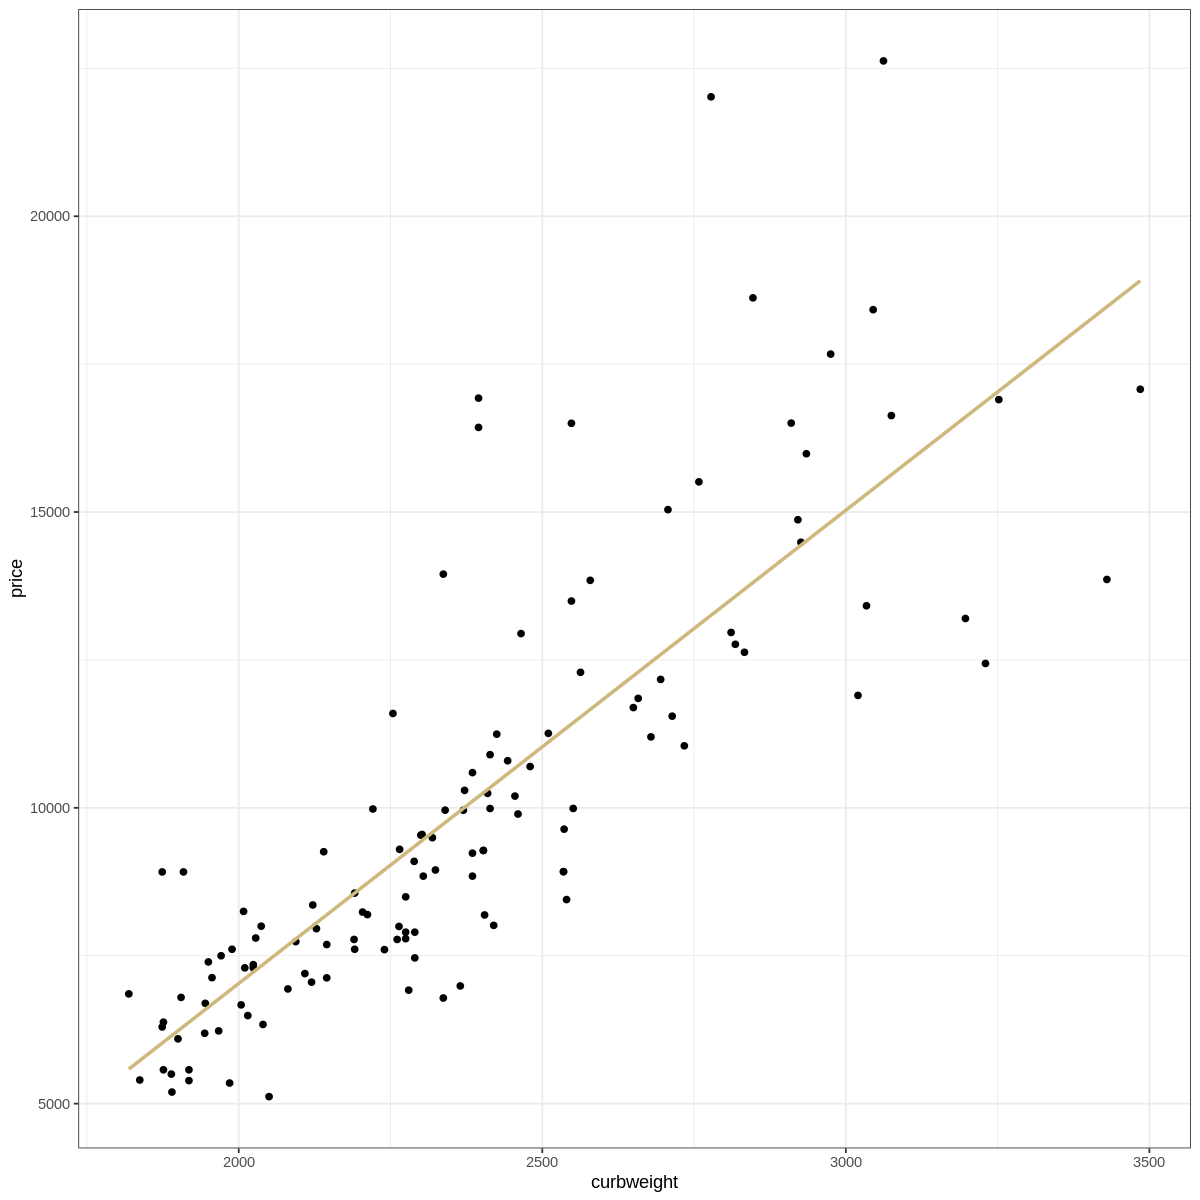

In [1278]:
# for training data
ggplot(train, aes(x = curbweight, y = price)) +
    geom_point() +
    geom_smooth(method = "lm", col = "#CFB87C", se = F) +
    theme_bw()

We can observe some Non-linearity in the model. There is high amount of variability. So GEM model is the appropriate one that could be used to fit the model. But just for illustration purposes I have used the SLR model although it might not be a good fit

`geom_smooth()` using formula = 'y ~ x'


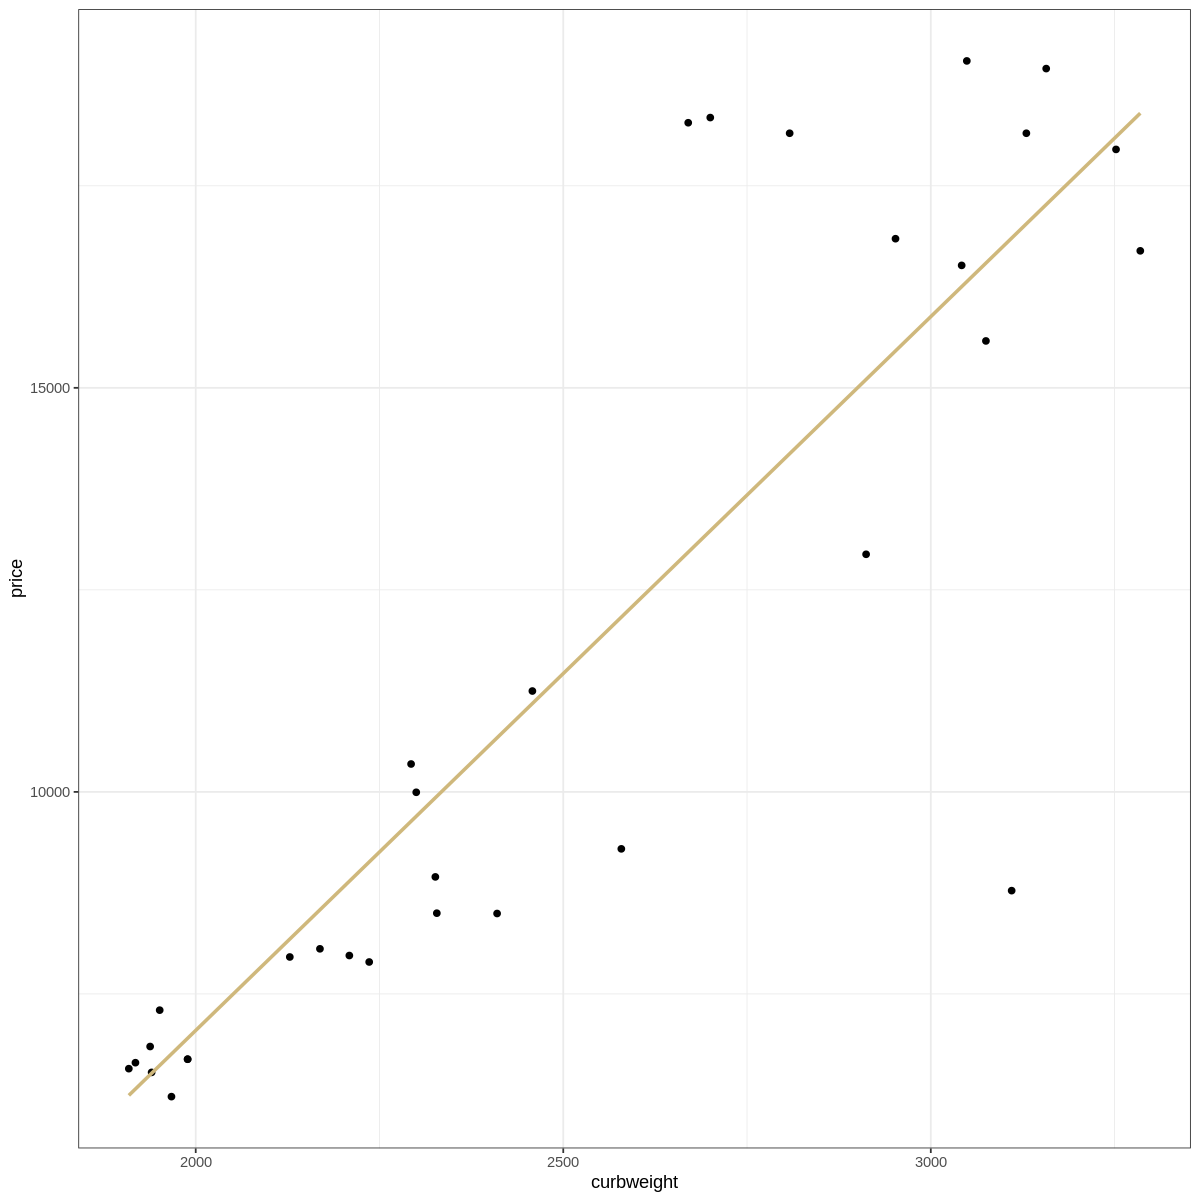

In [1279]:
# for testing data
ggplot(test, aes(x = curbweight, y = price)) +
    geom_point() +
    geom_smooth(method = "lm", col = "#CFB87C", se = F) +
    theme_bw()

In [1280]:
table(df_clean$carbody)


convertible     hardtop   hatchback       sedan       wagon 
          4           4          56          72          21 

# Multiple Linear Regression, F-Test

In [1281]:
head(df_clean)

,CarName,carbody,fueltype,carlength,enginesize,curbweight,highwaympg,price
,<chr>,<chr>,<chr>,<dbl>,<int>,<int>,<int>,<dbl>
1,alfa-romero giulia,convertible,gas,168.8,130,2548,27,13495
2,alfa-romero stelvio,convertible,gas,168.8,130,2548,27,16500
4,audi 100 ls,sedan,gas,176.6,109,2337,30,13950
11,bmw 320i,sedan,gas,176.8,108,2395,29,16430
12,bmw 320i,sedan,gas,176.8,108,2395,29,16925
20,chevrolet monte carlo,hatchback,gas,155.9,90,1874,43,6295


In [1282]:
df_clean <- df_clean[, -which(names(df_clean) == "CarName")]

In [1283]:
head(df_clean)

,carbody,fueltype,carlength,enginesize,curbweight,highwaympg,price
,<chr>,<chr>,<dbl>,<int>,<int>,<int>,<dbl>
1,convertible,gas,168.8,130,2548,27,13495
2,convertible,gas,168.8,130,2548,27,16500
4,sedan,gas,176.6,109,2337,30,13950
11,sedan,gas,176.8,108,2395,29,16430
12,sedan,gas,176.8,108,2395,29,16925
20,hatchback,gas,155.9,90,1874,43,6295


In [1284]:
table(df_clean$fueltype)


diesel    gas 
    14    143 

Converting the categorical variables into numerical with one-hot encoding so that the data set could be used for Linear regression analysis.

In [1285]:
df_clean$carbody <- as.factor(df_clean$carbody)
df_clean$fueltype <- as.factor(df_clean$fueltype)

df_encoded <- cbind(df_clean, model.matrix(~ carbody + fueltype - 1, data = df_clean))

df_encoded <- df_encoded[, !(names(df_encoded) %in% c("carbody", "fueltype"))]

head(df_encoded)


,carlength,enginesize,curbweight,highwaympg,price,carbodyconvertible,carbodyhardtop,carbodyhatchback,carbodysedan,carbodywagon,fueltypegas
,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,168.8,130,2548,27,13495,1,0,0,0,0,1
2,168.8,130,2548,27,16500,1,0,0,0,0,1
4,176.6,109,2337,30,13950,0,0,0,1,0,1
11,176.8,108,2395,29,16430,0,0,0,1,0,1
12,176.8,108,2395,29,16925,0,0,0,1,0,1
20,155.9,90,1874,43,6295,0,0,1,0,0,1


In [1286]:
dim(df_encoded)

[1] 157  11

In [1287]:
mlr_model <- lm(price ~ . , data = df_encoded)
summary(mlr_model)


Call:
lm(formula = price ~ ., data = df_encoded)

Residuals:
    Min      1Q  Median      3Q     Max 
-4843.1 -1064.2  -251.7   564.4  8505.5 

Coefficients: (1 not defined because of singularities)
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)        -11956.143   5828.196  -2.051 0.042000 *  
carlength              22.906     35.037   0.654 0.514286    
enginesize              6.431     16.862   0.381 0.703471    
curbweight              7.256      1.317   5.510 1.57e-07 ***
highwaympg            -61.088     58.309  -1.048 0.296512    
carbodyconvertible   4597.609   1182.323   3.889 0.000152 ***
carbodyhardtop        265.507   1197.644   0.222 0.824862    
carbodyhatchback     1633.935    611.024   2.674 0.008341 ** 
carbodysedan         2272.552    531.621   4.275 3.43e-05 ***
carbodywagon               NA         NA      NA       NA    
fueltypegas           486.454    794.511   0.612 0.541307    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’

We can see from the summary output that F-stat is >>1 and value of p is < 0.05. So atleast one of the predictor variables is associated with responsible variable i.e. it is not equal to zero

We can also see that the features such as fueltype,carlength, enginesize, highway are not related to model and don't have any significance impact towards the model.

We can see that carbody wagon has NA which indicates multicollinearity. So we have to remove the carbody wagon feature.

In [1288]:
df_encoded <- df_encoded[, -which(names(df_encoded) == "carbodywagon")]

head(df_encoded)


,carlength,enginesize,curbweight,highwaympg,price,carbodyconvertible,carbodyhardtop,carbodyhatchback,carbodysedan,fueltypegas
,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,168.8,130,2548,27,13495,1,0,0,0,1
2,168.8,130,2548,27,16500,1,0,0,0,1
4,176.6,109,2337,30,13950,0,0,0,1,1
11,176.8,108,2395,29,16430,0,0,0,1,1
12,176.8,108,2395,29,16925,0,0,0,1,1
20,155.9,90,1874,43,6295,0,0,1,0,1


In [1289]:
mlr_model <- lm(price ~ . , data = df_encoded)
summary(mlr_model)


Call:
lm(formula = price ~ ., data = df_encoded)

Residuals:
    Min      1Q  Median      3Q     Max 
-4843.1 -1064.2  -251.7   564.4  8505.5 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)        -11956.143   5828.196  -2.051 0.042000 *  
carlength              22.906     35.037   0.654 0.514286    
enginesize              6.431     16.862   0.381 0.703471    
curbweight              7.256      1.317   5.510 1.57e-07 ***
highwaympg            -61.088     58.309  -1.048 0.296512    
carbodyconvertible   4597.609   1182.323   3.889 0.000152 ***
carbodyhardtop        265.507   1197.644   0.222 0.824862    
carbodyhatchback     1633.935    611.024   2.674 0.008341 ** 
carbodysedan         2272.552    531.621   4.275 3.43e-05 ***
fueltypegas           486.454    794.511   0.612 0.541307    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1991 on 147 degrees of freedom
Multiple R-squared:  0.7577,	Adjust

### Full F-test

H0 : All the slopes are zero. It means no predictor variable is significant. $$ Y_i = \beta_o + ϵ_i $$
HA : Atleast one of the the predictor variable or the feature is significant and is related in predicting the target variable.
$$ Atleast\, one \,\, \beta_j \ne 0\,\, where \,\, j= 1,2,3,....,p $$

In [1290]:
full_f_test <- anova(mlr_model)
print(full_f_test)

Analysis of Variance Table

Response: price
                    Df     Sum Sq    Mean Sq  F value    Pr(>F)    
carlength            1 1308075482 1308075482 329.9686 < 2.2e-16 ***
enginesize           1  200597826  200597826  50.6018 4.597e-11 ***
curbweight           1  182304468  182304468  45.9872 2.701e-10 ***
highwaympg           1   12522165   12522165   3.1588  0.077588 .  
carbodyconvertible   1   33792397   33792397   8.5243  0.004057 ** 
carbodyhardtop       1   10109766   10109766   2.5502  0.112425    
carbodyhatchback     1    2255151    2255151   0.5689  0.451914    
carbodysedan         1   71041334   71041334  17.9205 4.040e-05 ***
fueltypegas          1    1486082    1486082   0.3749  0.541307    
Residuals          147  582743551    3964242                       
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


We have to reject the Null hypothesis. Many of the features are significant in predicting the model of the model.

## Imp Note:
1. We can get confused that while in MLR individual variables such as fueltype, carlength, enginesize, highway had high p value and are not significant towards target variable, the full F test shows they are significant now.
2. It is because sometimes although individual co-efficients of the model have high p values they are still statistically significant as an overall model in predicting the target variable.
3. So this is the reason.

## Partial F-test

H0 : Reduced Model is sufficient.

HA : Reduced model is not sufficient.

Reduced model means only necessary features and not all the features from the full model.

$$ ω = Y_i = β_0 + β_1 x_1 +.... + β_q x_p (q < p) $$

In [1291]:
reduced_model_1 <- lm(price ~ curbweight, data = df_encoded)

In [1292]:
anova(reduced_model_1, mlr_model) # mlr_model is a full model where i have fit all of the features.

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,155,723673001,NA,NA,NA,NA
2,147,582743551,8,140929450,4.443771,7.65966e-05


We can see that the p value is very small which indicates that the reduced_model_1 is not sufficient in predicting the output. We have to add few more features.

Let us try adding the significant features from the MLR model.

In [1293]:
reduced_model_2 <- lm(price ~ curbweight + enginesize, data = df_encoded)

In [1294]:
anova(reduced_model_2, mlr_model)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,154,714381689,NA,NA,NA,NA
2,147,582743551,7,131638138,4.743769,7.892122e-05


The value of p is < 0.05. This indicates that the reduced_model_2 is also not sufficient in predicting the price of the product car.

In [1295]:
reduced_model_3 <- lm(price ~ curbweight + enginesize + carlength + carbodysedan, data = df_encoded)

In [1296]:
anova(reduced_model_3, mlr_model)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,152,675675443,NA,NA,NA,NA
2,147,582743551,5,92931892,4.688508,0.0005306836


It is still not sufficient. Let us try adding one more variable which has 2 stars from the summary output

In [1297]:
reduced_model_4 <- lm(price ~ curbweight + enginesize + carlength + carbodysedan + carbodyconvertible, data = df_encoded)

In [1298]:
anova(reduced_model_4, mlr_model)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,151,633948401,NA,NA,NA,NA
2,147,582743551,4,51204851,3.22917,0.01421623


It is still less than 0.05. Let us try adding the last variable highway which only has a dot in the summary output.

In [1299]:
reduced_model_4 <- lm(price ~ curbweight + enginesize + carlength +
                              carbodysedan + carbodyconvertible + highwaympg, data = df_encoded)

In [1300]:
anova(reduced_model_4, mlr_model)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,150,616980389,NA,NA,NA,NA
2,147,582743551,3,34236838,2.878805,0.0380744


But this doesn't give information that this is the best model. There might be some other model which gives better mspe (lowest value) than this model. There are hundreds of combinations that could be tried and hence the feature such as **backward selection** could be used to predict the best model.

## MLR Model Comparision, MLR Diagnostics and ANOVA

In [1301]:
mod.1 <- lm(price ~ curbweight , data = df_encoded)
mod.2 <- lm(price ~ curbweight + enginesize , data = df_encoded)
mod.3 <- lm(price ~ curbweight + enginesize + carlength , data = df_encoded)
mod.4 <- lm(price ~ curbweight + enginesize + carlength + carbodysedan , data = df_encoded)
mod.5 <- lm(price ~ curbweight + enginesize + carlength + carbodysedan + carbodyconvertible , data = df_encoded)

In [1302]:
summary(mod.1)
summary(mod.2)
summary(mod.3)
summary(mod.4)
summary(mod.5)


Call:
lm(formula = price ~ curbweight, data = df_encoded)

Residuals:
    Min      1Q  Median      3Q     Max 
-7428.9 -1021.8  -252.6   618.6  8563.9 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -9580.1664  1063.3051   -9.01 7.21e-16 ***
curbweight      8.2917     0.4369   18.98  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2161 on 155 degrees of freedom
Multiple R-squared:  0.6991,	Adjusted R-squared:  0.6971 
F-statistic: 360.1 on 1 and 155 DF,  p-value: < 2.2e-16



Call:
lm(formula = price ~ curbweight + enginesize, data = df_encoded)

Residuals:
    Min      1Q  Median      3Q     Max 
-6307.7 -1092.1  -224.7   615.1  8060.3 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -9899.3357  1083.6091  -9.136 3.54e-16 ***
curbweight      7.3722     0.7822   9.425  < 2e-16 ***
enginesize     22.3652    15.8030   1.415    0.159    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2154 on 154 degrees of freedom
Multiple R-squared:  0.703,	Adjusted R-squared:  0.6991 
F-statistic: 182.2 on 2 and 154 DF,  p-value: < 2.2e-16



Call:
lm(formula = price ~ curbweight + enginesize + carlength, data = df_encoded)

Residuals:
    Min      1Q  Median      3Q     Max 
-6105.6 -1090.2  -213.6   621.8  8173.4 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -11054.412   3951.973  -2.797  0.00582 ** 
curbweight       7.121      1.139   6.250 3.88e-09 ***
enginesize      22.598     15.868   1.424  0.15645    
carlength       10.092     33.196   0.304  0.76154    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2160 on 153 degrees of freedom
Multiple R-squared:  0.7031,	Adjusted R-squared:  0.6973 
F-statistic: 120.8 on 3 and 153 DF,  p-value: < 2.2e-16



Call:
lm(formula = price ~ curbweight + enginesize + carlength + carbodysedan, 
    data = df_encoded)

Residuals:
    Min      1Q  Median      3Q     Max 
-6021.6 -1283.1  -214.0   788.7  8144.9 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -7495.025   4043.444  -1.854  0.06573 .  
curbweight       7.742      1.132   6.840 1.82e-10 ***
enginesize      27.516     15.578   1.766  0.07935 .  
carlength      -25.423     34.587  -0.735  0.46344    
carbodysedan  1065.388    363.076   2.934  0.00386 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2108 on 152 degrees of freedom
Multiple R-squared:  0.719,	Adjusted R-squared:  0.7117 
F-statistic: 97.25 on 4 and 152 DF,  p-value: < 2.2e-16



Call:
lm(formula = price ~ curbweight + enginesize + carlength + carbodysedan + 
    carbodyconvertible, data = df_encoded)

Residuals:
    Min      1Q  Median      3Q     Max 
-5685.3 -1213.2  -267.0   744.2  8674.6 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        -9769.043   3995.203  -2.445  0.01563 *  
curbweight             7.337      1.108   6.625 5.76e-10 ***
enginesize            22.254     15.231   1.461  0.14606    
carlength             -3.729     34.310  -0.109  0.91359    
carbodysedan        1134.028    353.520   3.208  0.00163 ** 
carbodyconvertible  3407.688   1080.910   3.153  0.00195 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2049 on 151 degrees of freedom
Multiple R-squared:  0.7364,	Adjusted R-squared:  0.7277 
F-statistic: 84.37 on 5 and 151 DF,  p-value: < 2.2e-16


In [1303]:
anova(mod.1, mod.2)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,155,723673001,NA,NA,NA,NA
2,154,714381689,1,9291312,2.002938,0.1590137


H0 : mod.1 is sufficient

HA : mod.1 is not sufficient

p value > 0.05 hence we fail to reject H0. therefore mod.1 is better

In [1304]:
anova(mod.1, mod.3)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,155,723673001,NA,NA,NA,NA
2,153,713950445,2,9722556,1.041775,0.355317


H0 : mod.2 is sufficient

HA : mod.2 is not sufficient

p value > 0.05 hence we fail to reject H0. therefore mod.1 is better

In [1305]:
anova(mod.1, mod.4)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,155,723673001,NA,NA,NA,NA
2,152,675675443,3,47997558,3.599178,0.01499818


H0 : mod.3 is sufficient

HA : mod.3 is not sufficient

p value < 0.05 hence we  to reject H0. therefore mod.4 is better

In [1306]:
anova(mod.4, mod.5)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,152,675675443,NA,NA,NA,NA
2,151,633948401,1,41727042,9.938953,0.001952262


H0 : mod.4 is sufficient

HA : mod.4 is not sufficient

p value < 0.05 hence we to reject H0. therefore mod.5 is better

In [1307]:
final_model <- mod.5

Now, Let us use MSE to calculate the best model and see if both Ftest and MSE are giving the same output.

In [1308]:
MSE.1 = NA
MSE.2 = NA
MSE.3 = NA
MSE.4 = NA
MSE.5 = NA

calc_MSE = function(model, n){
    MSE = 1/n * sum((resid(model))^2)
    return(MSE)
}

n = length(df_encoded$price)

MSE.1 = calc_MSE(mod.1, n)
MSE.2 = calc_MSE(mod.2, n)
MSE.3 = calc_MSE(mod.3, n)
MSE.4 = calc_MSE(mod.4, n)
MSE.5 = calc_MSE(mod.5, n)

MSE.1
MSE.2
MSE.3
MSE.4
MSE.5

[1] 4609382

[1] 4550202

[1] 4547455

[1] 4303665

[1] 4037888

We should analyse that as we keep adding the predictors the mse will get lower. so obviously the model 5 will give better result.

Hence the Theoritical Fstat and the mse are same

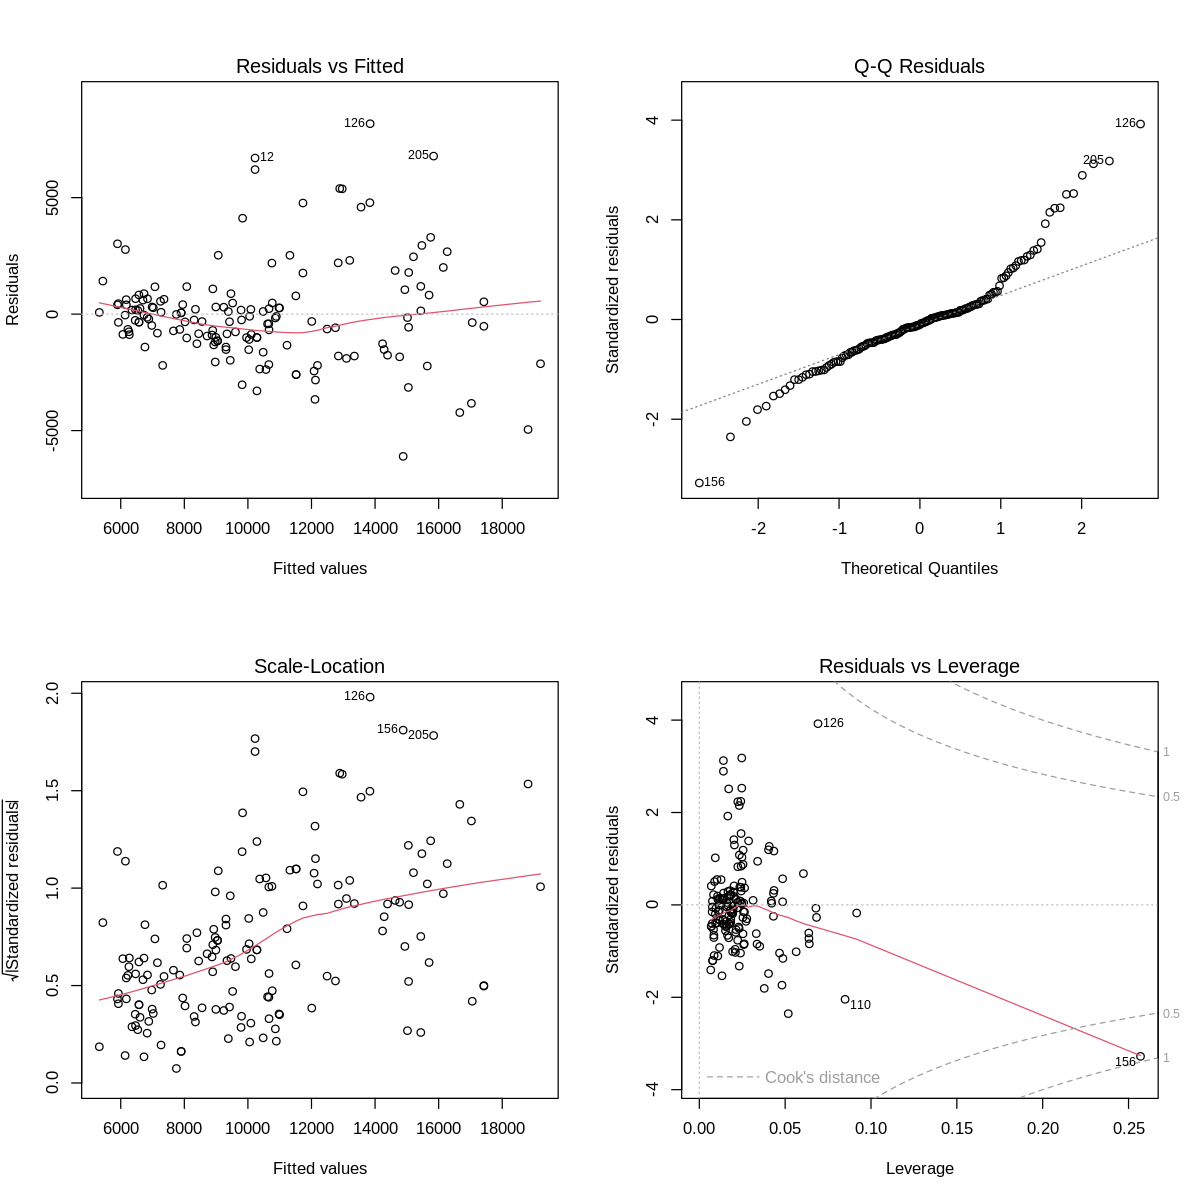

In [1309]:
par(mfrow = c(2,2))
plot(mod.3)

# Model Selection – AIC, BIC, MSPE, R^2, Ra^2

In [1310]:
head(df_encoded)

,carlength,enginesize,curbweight,highwaympg,price,carbodyconvertible,carbodyhardtop,carbodyhatchback,carbodysedan,fueltypegas
,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,168.8,130,2548,27,13495,1,0,0,0,1
2,168.8,130,2548,27,16500,1,0,0,0,1
4,176.6,109,2337,30,13950,0,0,0,1,1
11,176.8,108,2395,29,16430,0,0,0,1,1
12,176.8,108,2395,29,16925,0,0,0,1,1
20,155.9,90,1874,43,6295,0,0,1,0,1


In [1311]:
set.seed(42)
n = floor(0.8 * nrow(df_encoded))
index = sample(seq_len(nrow(df_encoded)), size = n)

train = df_encoded[index,]
test = df_encoded[-index,]


In [1312]:
head(train)

,carlength,enginesize,curbweight,highwaympg,price,carbodyconvertible,carbodyhardtop,carbodyhatchback,carbodysedan,fueltypegas
,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
79,157.3,92,2004,38,6669,0,0,1,0,1
96,165.6,97,2028,37,7799,0,0,1,0,1
199,188.8,130,3045,22,18420,0,0,0,1,1
111,198.9,152,3430,25,13860,0,0,0,0,0
191,165.7,109,2221,29,9980,0,0,1,0,1
163,166.3,98,2140,34,9258,0,0,0,1,1


In [1313]:
fullmodel = lm(price ~ . , data = train)

In [1314]:
summary(fullmodel)


Call:
lm(formula = price ~ ., data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-4563.7  -859.3  -318.9   581.0  8945.4 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)        -11882.472   6164.729  -1.927 0.056385 .  
carlength               7.003     39.888   0.176 0.860949    
enginesize            -14.507     20.105  -0.722 0.472026    
curbweight              8.586      1.754   4.894 3.25e-06 ***
highwaympg            -29.374     62.054  -0.473 0.636859    
carbodyconvertible   4759.599   1168.248   4.074 8.52e-05 ***
carbodyhardtop        679.223   1194.392   0.569 0.570684    
carbodyhatchback     1609.803    645.783   2.493 0.014098 *  
carbodysedan         2260.553    566.952   3.987 0.000118 ***
fueltypegas          1293.575    856.359   1.511 0.133646    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1906 on 115 degrees of freedom
Multiple R-squared:  0.7448,	Adjusted R-

In [1315]:
pvals <- summary(fullmodel)$coefficients[,4][-1] # getting p values of all the variables excluding the intercept
pvals

carlength         enginesize         curbweight         highwaympg 
      8.609487e-01       4.720264e-01       3.245353e-06       6.368588e-01 
carbodyconvertible     carbodyhardtop   carbodyhatchback       carbodysedan 
      8.524559e-05       5.706843e-01       1.409824e-02       1.178454e-04 
       fueltypegas 
      1.336455e-01

In [1316]:
x <- which.max(pvals)
x

carlength 
        1

In [1317]:
critical_val <- 0.15
mspe_values <- c()

while(TRUE) {
  p_values <- summary(fullmodel)$coefficients[,4][-1]
  highest_p_val <- max(p_values)
  if(highest_p_val > critical_val){
  cat("value of highest-p value removed is:", highest_p_val, '\n')
  }

  if(highest_p_val > critical_val){
    var_max_p = names(which.max(p_values))

    updated_formula <- as.formula(paste(". ~ . -", var_max_p))
    new_model <- update(fullmodel, updated_formula)

    predictions <- predict(new_model, newdata = test)
    mspe <- mean((test$price - predictions)^2)

    cat('Variable Removed is:' ,var_max_p, '\n' )
    print(summary(new_model))
    cat('MSPE:' , mspe)
    cat('\n')
    cat('STEP BREAK ---------------------------------------------', '\n')

    mspe_values <- c(mspe_values, mspe)

    fullmodel <- new_model
  }
  else {
    break
  }
}

value of highest-p value removed is: 0.8609487 
Variable Removed is: carlength 

Call:
lm(formula = price ~ enginesize + curbweight + highwaympg + carbodyconvertible + 
    carbodyhardtop + carbodyhatchback + carbodysedan + fueltypegas, 
    data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-4581.4  -876.2  -334.5   585.6  8886.0 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)        -11182.338   4681.349  -2.389  0.01852 *  
enginesize            -14.732     19.980  -0.737  0.46239    
curbweight              8.782      1.348   6.516 1.95e-09 ***
highwaympg            -27.797     61.144  -0.455  0.65023    
carbodyconvertible   4694.798   1103.766   4.253 4.28e-05 ***
carbodyhardtop        668.900   1187.949   0.563  0.57447    
carbodyhatchback     1577.238    615.981   2.561  0.01174 *  
carbodysedan         2261.253    564.564   4.005  0.00011 ***
fueltypegas          1315.318    843.808   1.559  0.12177    
---
Signif. cod

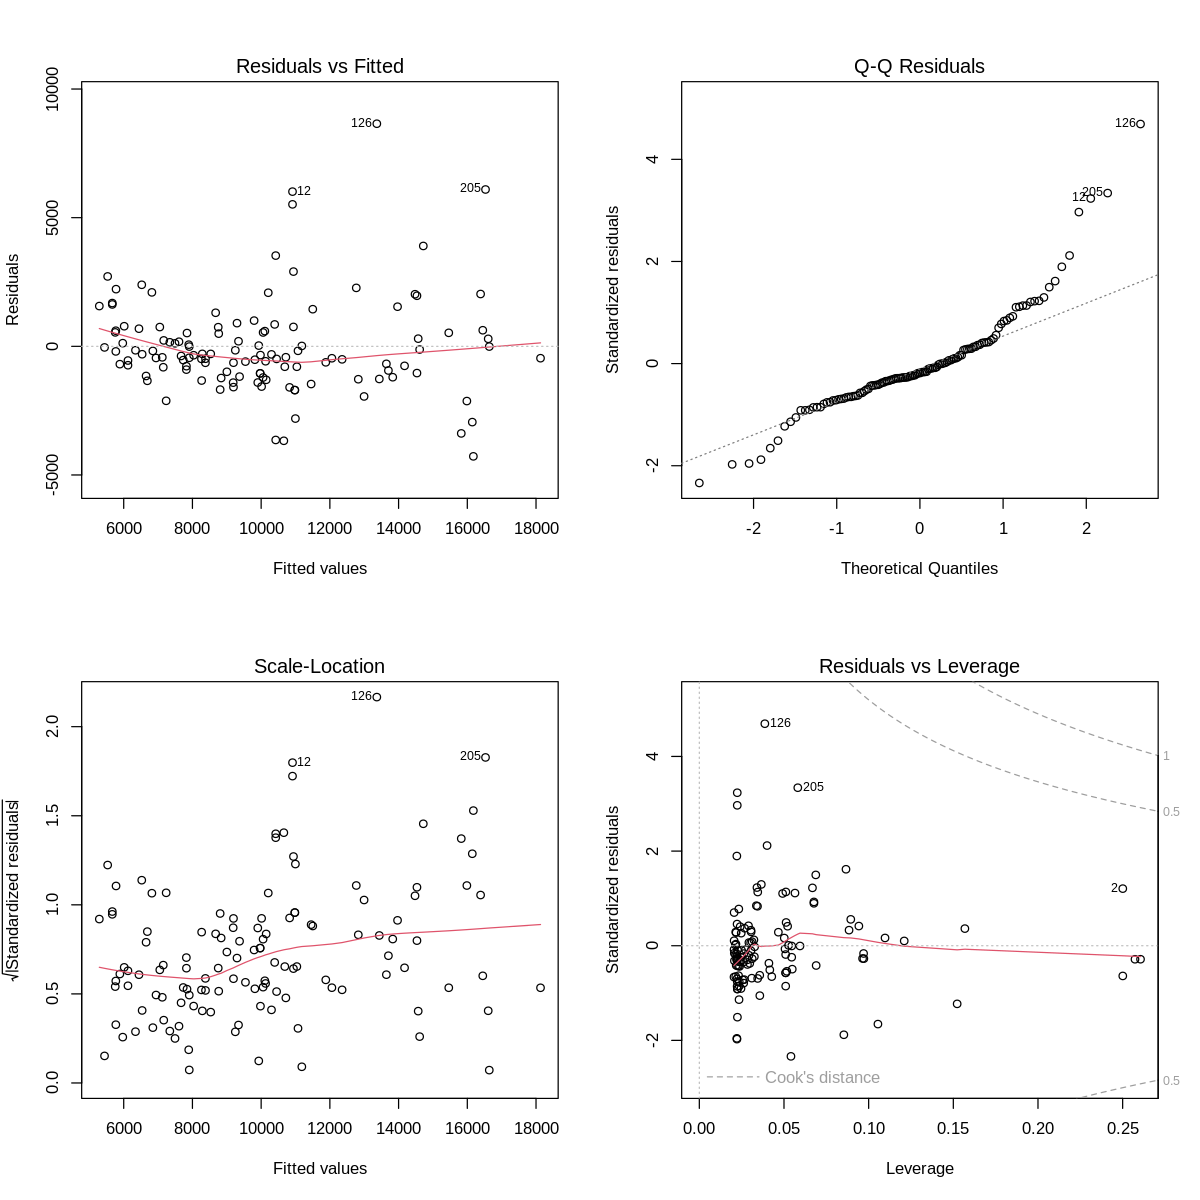

In [1318]:
par(mfrow = c(2,2))
plot(fullmodel)

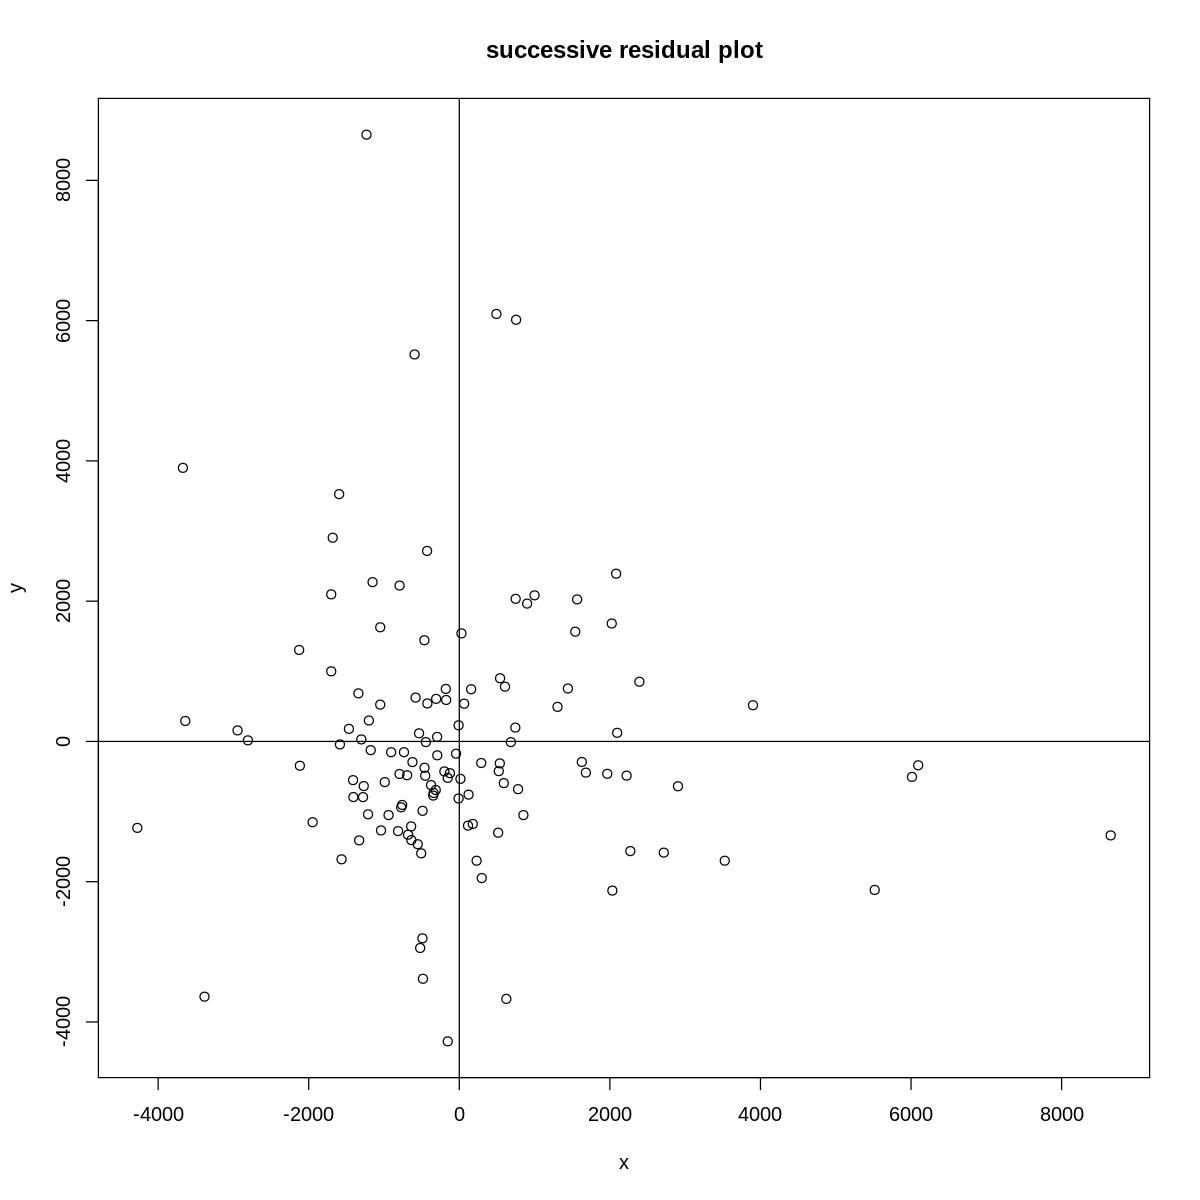

In [1319]:
n = dim(train)[1]
r = resid(fullmodel)
x = head(r,n-1)
y = tail(r,n-1)
plot(x,y, main = "successive residual plot")
abline(v = mean(r), h=mean(r))

Normality - Looking at Q-Q plot we can clearly see that the data points are deviating from the line at the tail ends which indicates the presence of skewness that indirectly states the violation of Normality.

Varience - Looking at (Fitted v/s Residuals) plot we can see that there are dots which are clustered towards the left end but they spreadout widely towards the right end. They are not distributed without any pattern across the line. This indicates the presence of heteroscedasticity which is again a violation of variance.

Linearity - Again looking at the same (Fitted v/s Residuals) plot we can see the C shaped curve which is slight parabola which indicates the presence of some pattern and non-linearity again violating the assumption.

Multicollinearity - Looking at the Succesive Residual Plot we can't see any pattern in graph and the points are randomly scattered around the intersection without any visible pattern which is not a violation of multicollinearity. So there is no correlation or independence between the predictors.

Influential points - Looking at the (Fitted v/s Leverage) plot we can clearly see that there are no influential points and none of them are lying inside the cooks distance lines.

In [1320]:
mspe_values

[1] 5708284 5781605 5707734 5522475

In [1321]:
best_model_index <- which.min(mspe_values)
best_model_mspe <- mspe_values[best_model_index]

In [1322]:
cat("Best model (Model", best_model_index, ") MSPE:", best_model_mspe, "\n")

Best model (Model 4 ) MSPE: 5522475 


In [1162]:
install.packages("leaps")
library(leaps)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [1323]:
reg = regsubsets(price ~ ., data = train)
reg_subsets = summary(reg)
reg_subsets

Subset selection object
Call: regsubsets.formula(price ~ ., data = train)
9 Variables  (and intercept)
                   Forced in Forced out
carlength              FALSE      FALSE
enginesize             FALSE      FALSE
curbweight             FALSE      FALSE
highwaympg             FALSE      FALSE
carbodyconvertible     FALSE      FALSE
carbodyhardtop         FALSE      FALSE
carbodyhatchback       FALSE      FALSE
carbodysedan           FALSE      FALSE
fueltypegas            FALSE      FALSE
1 subsets of each size up to 8
Selection Algorithm: exhaustive
         carlength enginesize curbweight highwaympg carbodyconvertible
1  ( 1 ) " "       " "        "*"        " "        " "               
2  ( 1 ) " "       " "        "*"        " "        "*"               
3  ( 1 ) " "       " "        "*"        " "        "*"               
4  ( 1 ) " "       " "        "*"        " "        "*"               
5  ( 1 ) " "       " "        "*"        " "        "*"               
6  ( 1 )

In [1324]:
reg_subsets$which

,(Intercept),carlength,enginesize,curbweight,highwaympg,carbodyconvertible,carbodyhardtop,carbodyhatchback,carbodysedan,fueltypegas
1,TRUE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
2,TRUE,FALSE,FALSE,TRUE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE
3,TRUE,FALSE,FALSE,TRUE,FALSE,TRUE,FALSE,FALSE,TRUE,FALSE
4,TRUE,FALSE,FALSE,TRUE,FALSE,TRUE,FALSE,TRUE,TRUE,FALSE
5,TRUE,FALSE,FALSE,TRUE,FALSE,TRUE,FALSE,TRUE,TRUE,TRUE
6,TRUE,FALSE,TRUE,TRUE,FALSE,TRUE,FALSE,TRUE,TRUE,TRUE
7,TRUE,FALSE,TRUE,TRUE,FALSE,TRUE,TRUE,TRUE,TRUE,TRUE
8,TRUE,FALSE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE


In [1325]:
n <- dim(train)[1]
p <- 9 # num of features

AIC <- 2*(2:10) + (n* log(reg_subsets$rss / n))

Warning message in 2 * (2:10) + (n * log(reg_subsets$rss/n)):
“longer object length is not a multiple of shorter object length”


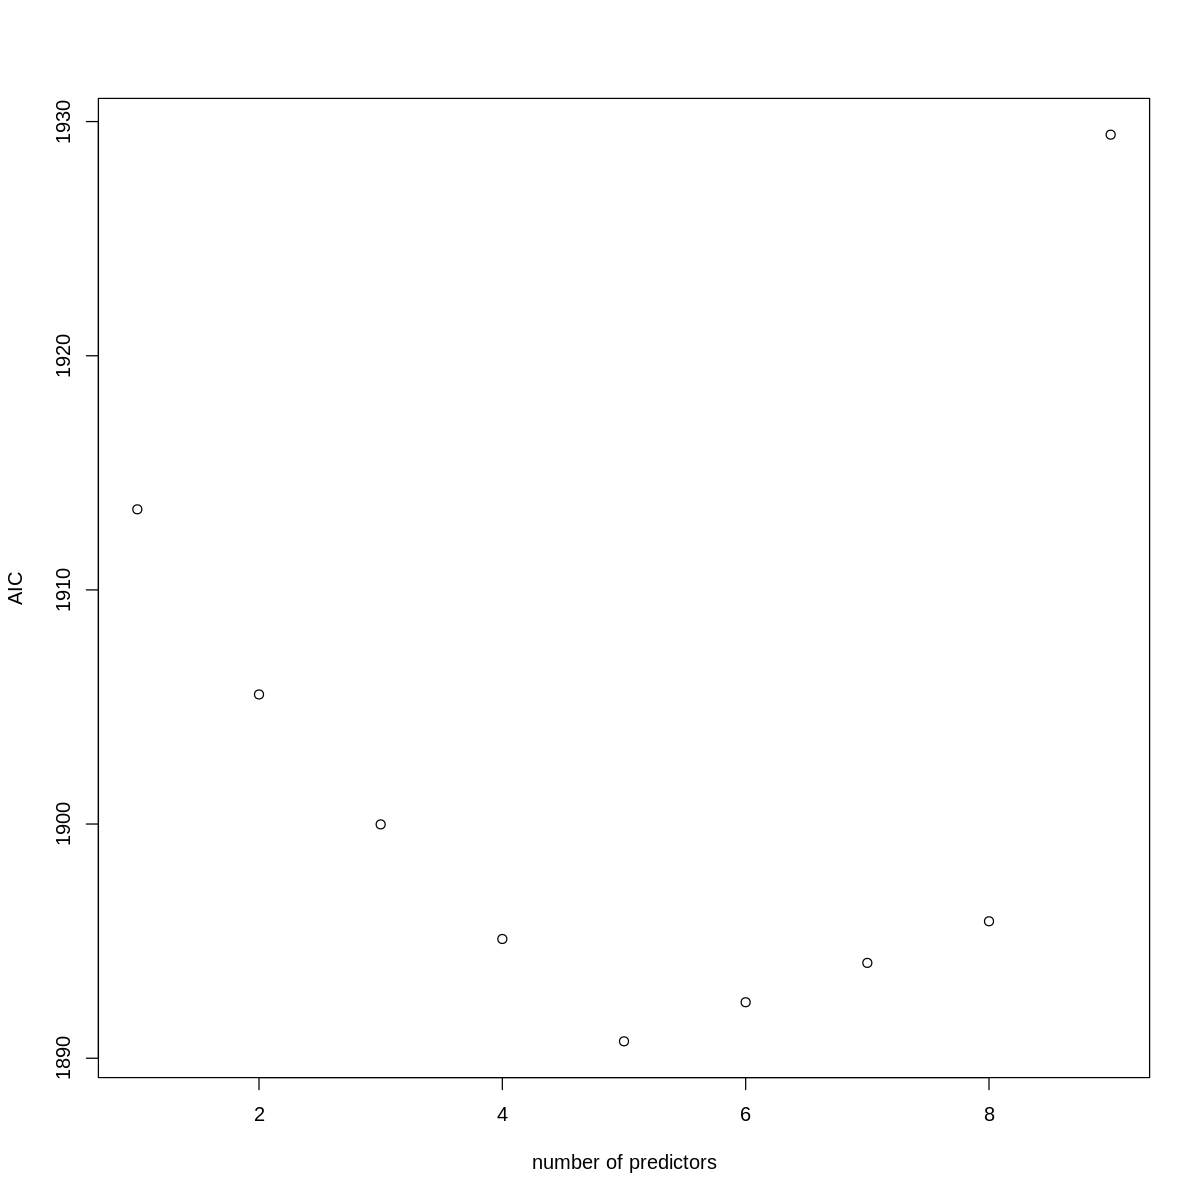

In [1326]:
plot(AIC ~ I(1:9), xlab = "number of predictors", ylab = "AIC")

Warning message in log(n) * (2:10) + n * log(reg_subsets$rss/n):
“longer object length is not a multiple of shorter object length”


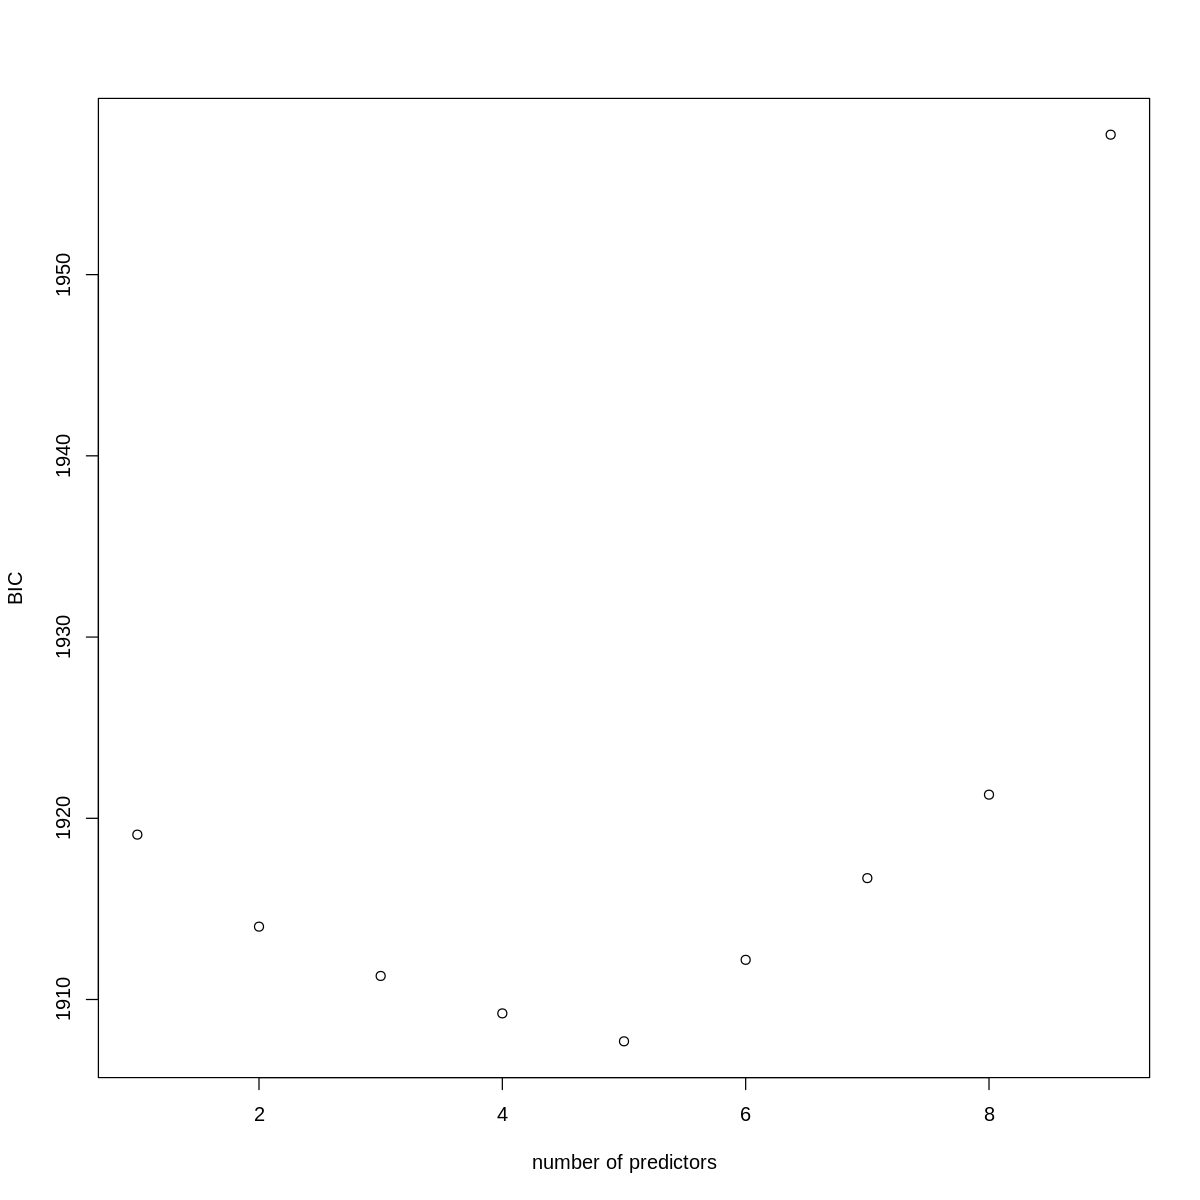

In [1327]:
BIC = log(n)*(2:10) + n*log(reg_subsets$rss/n)
plot(BIC ~ I(1:9), xlab = "number of predictors", ylab = "BIC")

In [1328]:
reg_subsets$adjr2

[1] 0.6686851 0.6914197 0.7071036 0.7205111 0.7321661 0.7306092 0.7290009
[8] 0.7271508

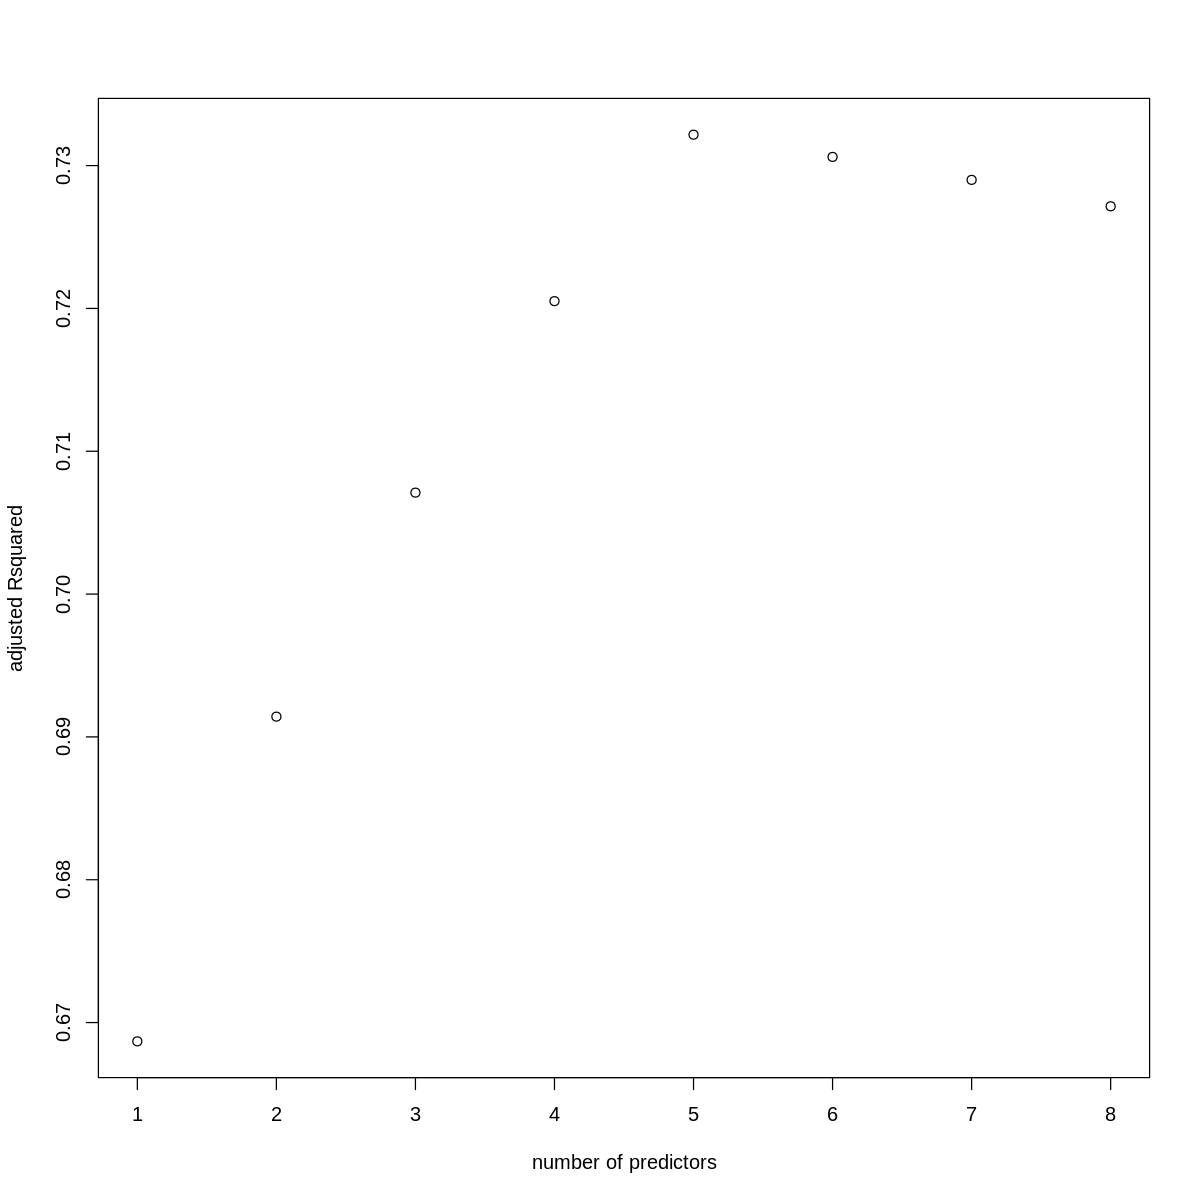

In [1329]:
plot(1:8, reg_subsets$adjr2, xlab = "number of predictors", ylab = "adjusted Rsquared")

In [1330]:
reg_subsets$which

,(Intercept),carlength,enginesize,curbweight,highwaympg,carbodyconvertible,carbodyhardtop,carbodyhatchback,carbodysedan,fueltypegas
1,TRUE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
2,TRUE,FALSE,FALSE,TRUE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE
3,TRUE,FALSE,FALSE,TRUE,FALSE,TRUE,FALSE,FALSE,TRUE,FALSE
4,TRUE,FALSE,FALSE,TRUE,FALSE,TRUE,FALSE,TRUE,TRUE,FALSE
5,TRUE,FALSE,FALSE,TRUE,FALSE,TRUE,FALSE,TRUE,TRUE,TRUE
6,TRUE,FALSE,TRUE,TRUE,FALSE,TRUE,FALSE,TRUE,TRUE,TRUE
7,TRUE,FALSE,TRUE,TRUE,FALSE,TRUE,TRUE,TRUE,TRUE,TRUE
8,TRUE,FALSE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE


In [1331]:
lm1 = lm(price ~ curbweight, data = train)
ystar = predict(lm1, test);
mspe1 = with(test, mean((price - ystar)^2))

In [1332]:
lm2 = lm(price ~ curbweight + carbodyconvertible, data = train)
ystar = predict(lm2, test);
mspe2 = with(test, mean((price - ystar)^2))

In [1333]:
lm3 = lm(price ~ curbweight + carbodyconvertible + carbodysedan, data = train)
ystar = predict(lm3, test);
mspe3 = with(test, mean((price - ystar)^2))

In [1334]:
lm4 = lm(price ~ curbweight + carbodyconvertible + carbodysedan + carbodyhatchback, data = train)
ystar = predict(lm4, test);
mspe4 = with(test, mean((price - ystar)^2))

In [1335]:
lm5 = lm(price ~ curbweight + carbodyconvertible + carbodysedan + carbodyhatchback + fueltypegas, data = train)
ystar = predict(lm5, test);
mspe5 = with(test, mean((price - ystar)^2))

In [1336]:
lm6 = lm(price ~ curbweight + carbodyconvertible + carbodysedan + carbodyhatchback + fueltypegas + enginesize, data = train)
ystar = predict(lm6, test);
mspe6 = with(test, mean((price - ystar)^2))

In [1337]:
lm7 = lm(price ~ curbweight + carbodyconvertible + carbodysedan + carbodyhatchback + fueltypegas + enginesize + carbodyhardtop, data = train)
ystar = predict(lm7, test);
mspe7 = with(test, mean((price - ystar)^2))

In [1338]:
lm8 = lm(price ~ curbweight + carbodyconvertible + carbodysedan + carbodyhatchback + fueltypegas + enginesize + carbodyhardtop + highwaympg, data = train)
ystar = predict(lm8, test);
mspe8 = with(test, mean((price - ystar)^2))

In [1339]:
lm9 = lm(price ~ curbweight + carbodyconvertible + carbodysedan + carbodyhatchback + fueltypegas + enginesize + carbodyhardtop + highwaympg + carlength, data = train)
ystar = predict(lm9, test);
mspe9 = with(test, mean((price - ystar)^2))

[1] 5898971 6085862 5618813 5230290 5522475 5707734 5781605 5708284 5673388

[1] 5230290

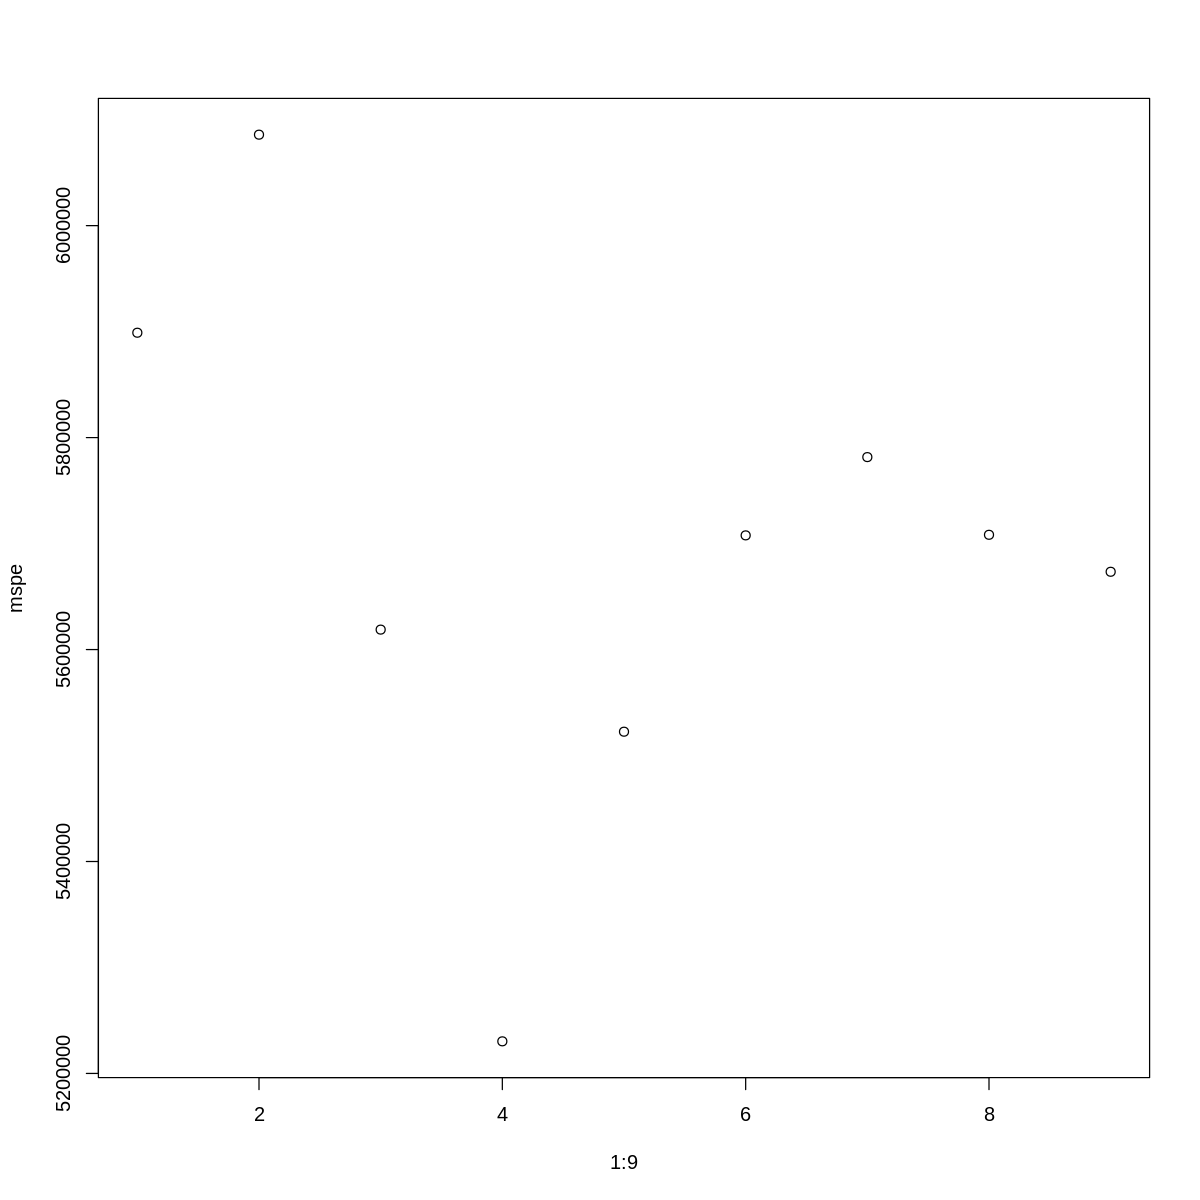

In [1340]:
mspe = c(mspe1,mspe2,mspe3,mspe4, mspe5, mspe6, mspe7, mspe8, mspe9); mspe
plot(1:9, mspe)
min(mspe)

In [1341]:
head(train)

,carlength,enginesize,curbweight,highwaympg,price,carbodyconvertible,carbodyhardtop,carbodyhatchback,carbodysedan,fueltypegas
,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
79,157.3,92,2004,38,6669,0,0,1,0,1
96,165.6,97,2028,37,7799,0,0,1,0,1
199,188.8,130,3045,22,18420,0,0,0,1,1
111,198.9,152,3430,25,13860,0,0,0,0,0
191,165.7,109,2221,29,9980,0,0,1,0,1
163,166.3,98,2140,34,9258,0,0,0,1,1


In [ ]:
install.packages("car")
install.packages("corrplot")
library(ggplot2)
library(car) #for the vif() function
library(corrplot)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘minqa’, ‘nloptr’, ‘Rcpp’, ‘RcppEigen’, ‘pbkrtest’, ‘lme4’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:dplyr’:

    recode


The following object is masked from ‘package:purrr’:

    some




AIC - 5

BIC - 5

R_A^2 - 5

MSPE - 4

In [1342]:
vif_aic = vif(lm(price ~ curbweight + carbodyconvertible + carbodysedan + carbodyhatchback + fueltypegas, data = train))
vif_bic = vif(lm(price ~ curbweight + carbodyconvertible + carbodysedan + carbodyhatchback + fueltypegas, data = train))
vif_adjr2 = vif(lm(price ~ curbweight + carbodyconvertible + carbodysedan + carbodyhatchback + fueltypegas, data = train))
vif_mspe = vif(lm(price ~ curbweight + carbodyconvertible + carbodysedan + carbodyhatchback , data = train))

In [1343]:
vif_aic

curbweight carbodyconvertible       carbodysedan   carbodyhatchback 
          1.169592           1.166398           2.188666           2.252229 
       fueltypegas 
          1.141165

In [1344]:
vif_bic

curbweight carbodyconvertible       carbodysedan   carbodyhatchback 
          1.169592           1.166398           2.188666           2.252229 
       fueltypegas 
          1.141165

In [1345]:
vif_mspe

curbweight carbodyconvertible       carbodysedan   carbodyhatchback 
          1.087687           1.161806           2.151925           2.251114

In [1346]:
vif_adjr2

curbweight carbodyconvertible       carbodysedan   carbodyhatchback 
          1.169592           1.166398           2.188666           2.252229 
       fueltypegas 
          1.141165

Same model for AIC, BIC, ADJ R2

In [1351]:
# To give the best model equation
summary(lm5)


Call:
lm(formula = price ~ curbweight + carbodyconvertible + carbodysedan + 
    carbodyhatchback + fueltypegas, data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-4276.3  -989.6  -340.6   606.8  8651.4 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)        -1.290e+04  1.553e+03  -8.309 1.79e-13 ***
curbweight          8.422e+00  4.907e-01  17.164  < 2e-16 ***
carbodyconvertible  4.454e+03  1.032e+03   4.315 3.32e-05 ***
carbodysedan        2.121e+03  5.049e+02   4.200 5.19e-05 ***
carbodyhatchback    1.349e+03  5.171e+02   2.609   0.0103 *  
fueltypegas         1.522e+03  6.100e+02   2.494   0.0140 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1881 on 119 degrees of freedom
Multiple R-squared:  0.743,	Adjusted R-squared:  0.7322 
F-statistic: 68.79 on 5 and 119 DF,  p-value: < 2.2e-16


# Generalised Models ( Problem of Non Linearity )

`geom_smooth()` using formula = 'y ~ x'


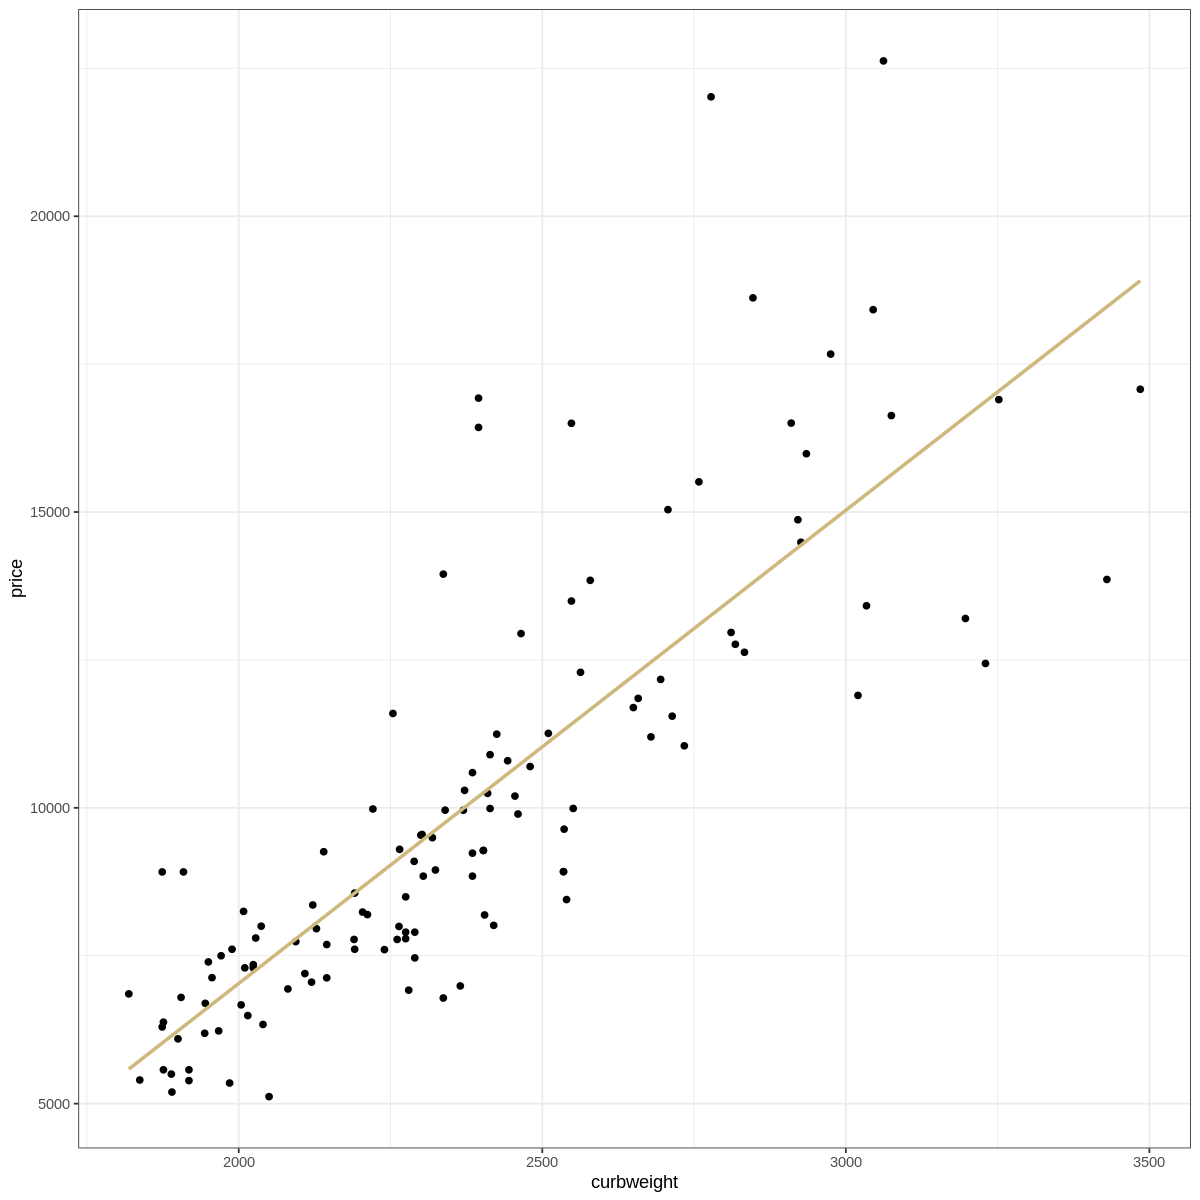

In [1347]:
# for training data
ggplot(train, aes(x = curbweight, y = price)) +
    geom_point() +
    geom_smooth(method = "lm", col = "#CFB87C", se = F) +
    theme_bw()

We can see that this is a non linear model.

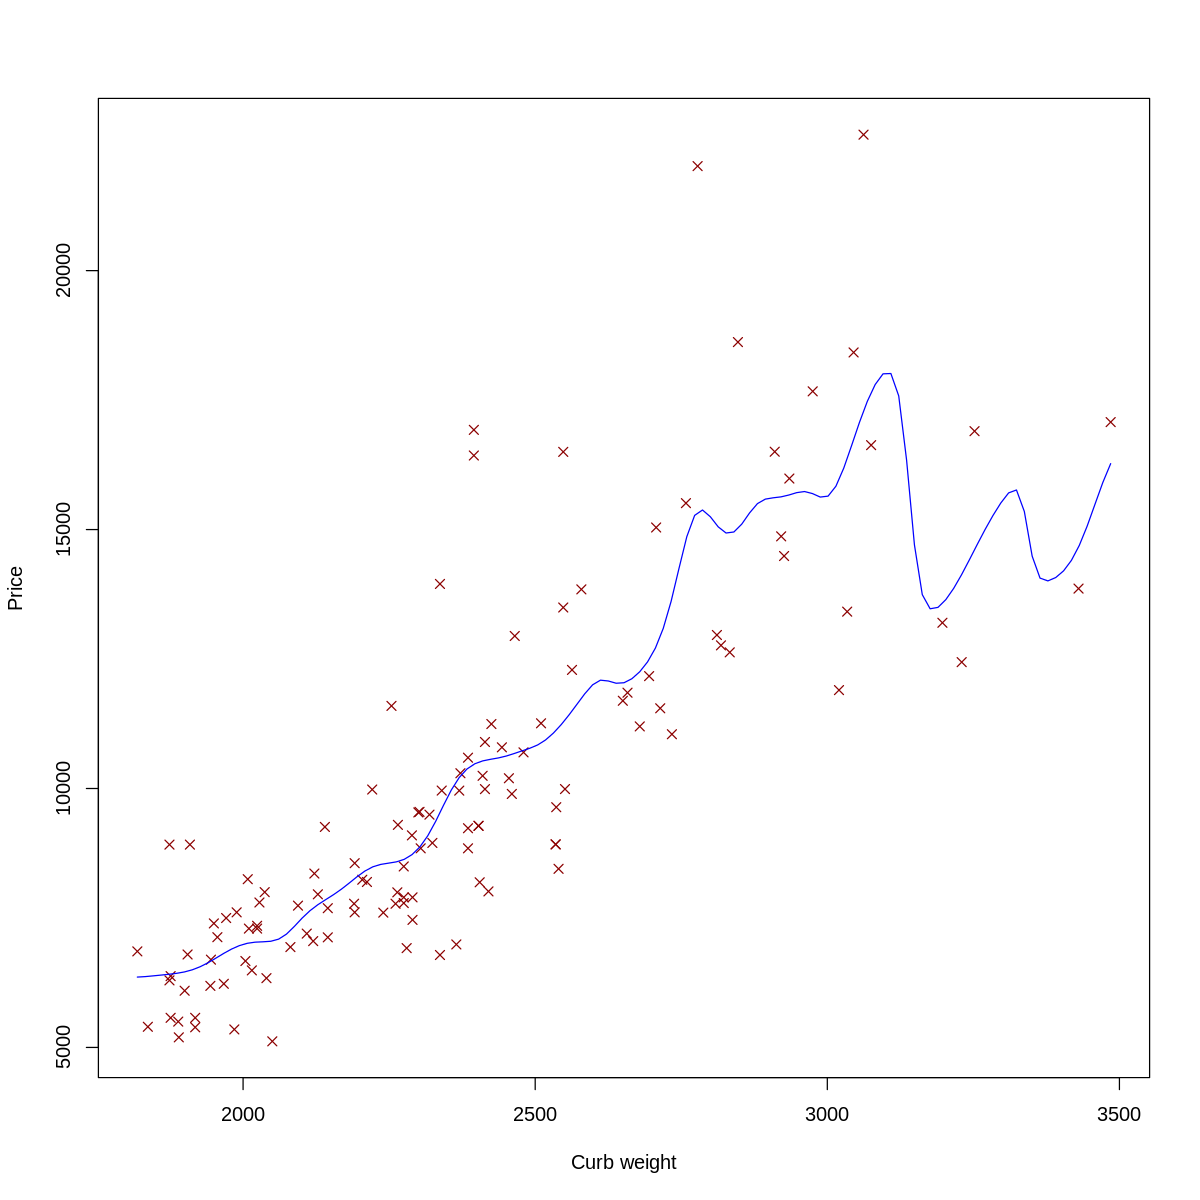

In [1348]:
with(train, plot(price ~ curbweight, pch = 4, col = "darkred",
                            xlab = "Curb weight",
                            ylab = "Price"))


with(train, lines(ksmooth(curbweight, price, "normal", bandwidth = 100), col = "blue"))

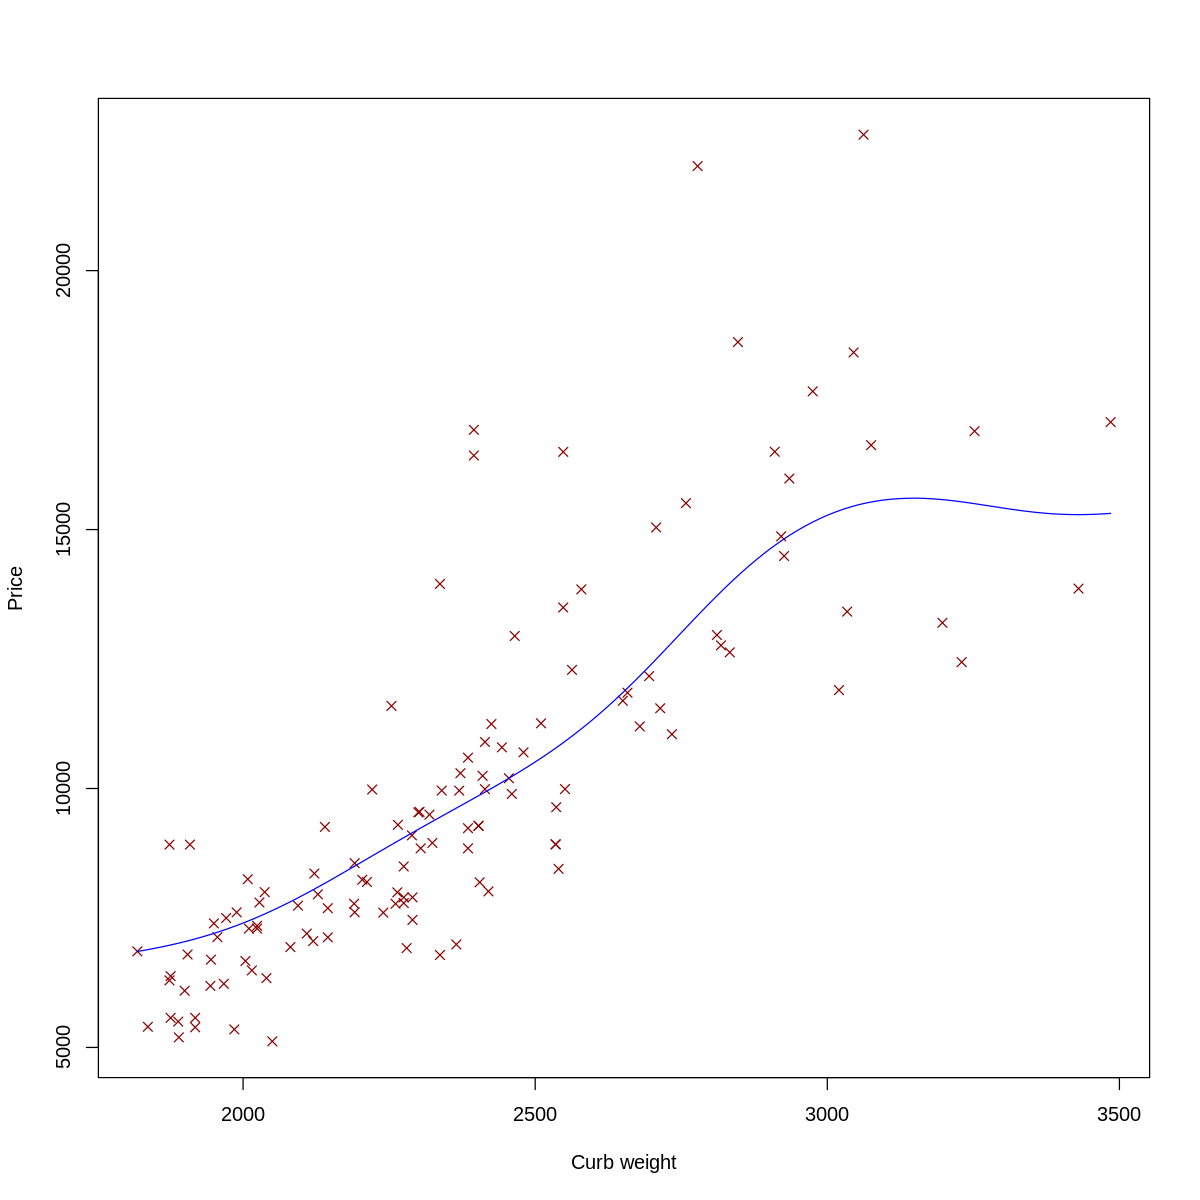

In [1349]:
with(train, plot(price ~ curbweight, pch = 4, col = "darkred",
                            xlab = "Curb weight",
                            ylab = "Price"))


with(train, lines(ksmooth(curbweight, price, "normal", bandwidth = 500), col = "blue"))

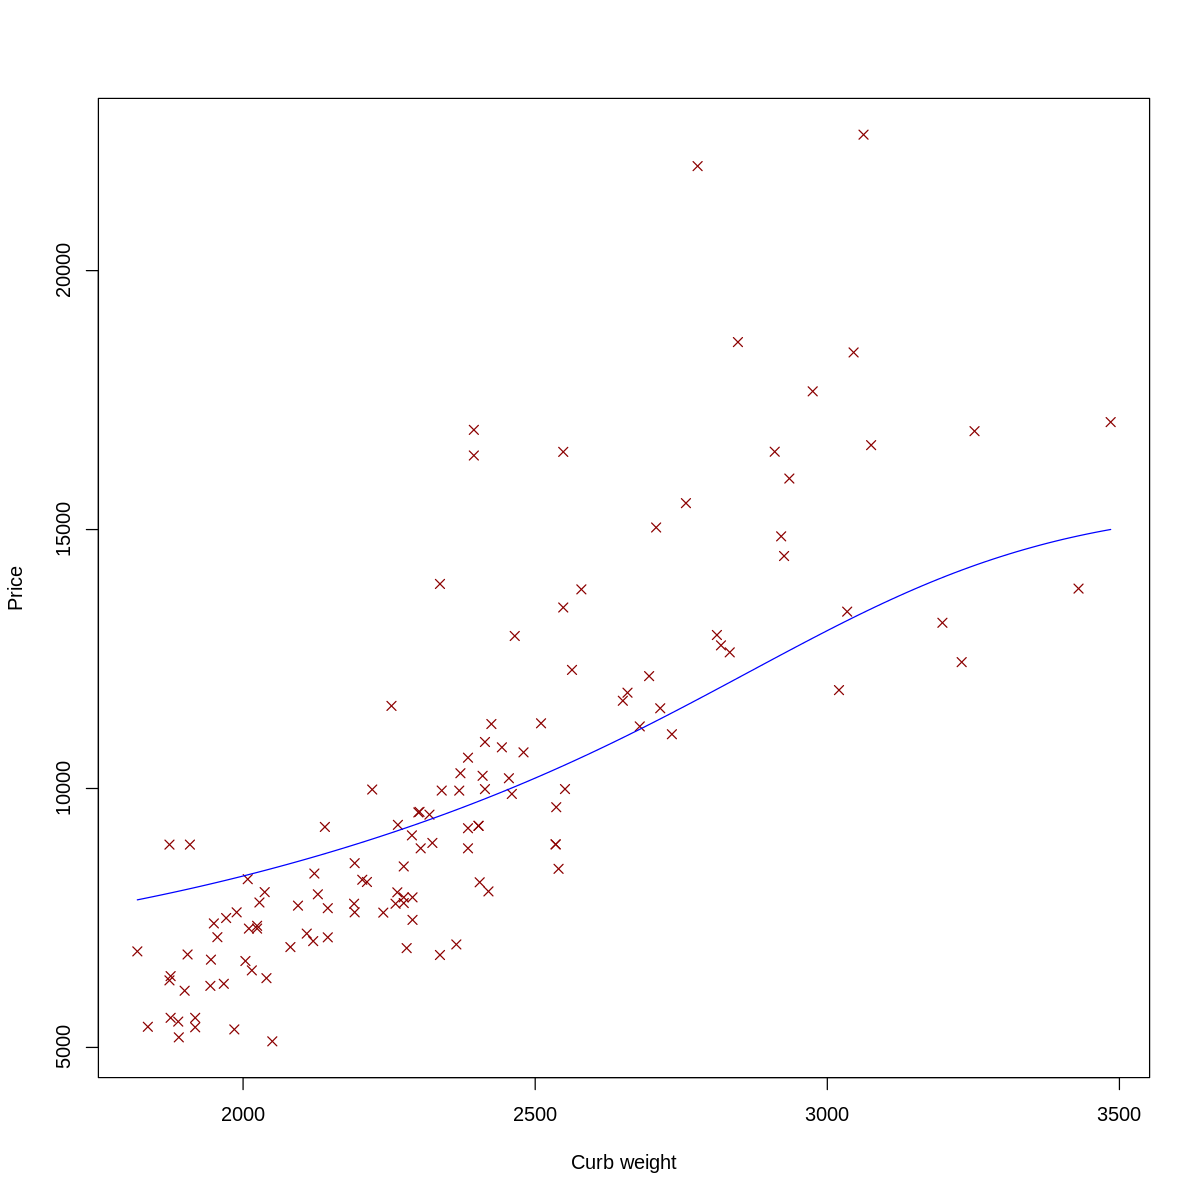

In [1350]:
with(train, plot(price ~ curbweight, pch = 4, col = "darkred",
                            xlab = "Curb weight",
                            ylab = "Price"))


with(train, lines(ksmooth(curbweight, price, "normal", bandwidth = 1000), col = "blue"))

Experimenting with different bandwidths allows us to visualise the graph for the best fitting line and then interpret which bandwidth would be the best choice.

Looking at the above graphs, we can clearly observe that for lower band widths the line is trying to fit each and every point which causes the problem of overfitting. This is not the ideal case because, Although these models perform well with the train data they can't perform well with the test data set. It is because they don't understand the practical trends and are trained to identify only a certain specific trend.

As we keep increasing the band width the curve become smoother and smoother and it tries to minimize the prediction error which is a good indication for the model. But if you can see that last graph where bandwidth is 500, the line underfits the model and doesn't capture a good trend of the data points.

So, it is very important to strike a balance between capturing the underlying trend and avoiding overfitting or underfitting. Hence we have to thoroughly analyze the data and choose the bandwidth according to the our requirements.

In [1209]:
fit_kernel <- ksmooth(train$curbweight, train$price, "normal", bandwidth = 500)
price_predicted_kernel <- approx(x = fit_kernel$x, y = fit_kernel$y, xout = test$curbweight)$y


fit_lm <- lm(price ~ curbweight, data = train)
price_predicted_lm <- predict(fit_lm, newdata = test)

MSPE_kernel <- mean((test$price - price_predicted_kernel)^2)
MSPE_lm <- mean((test$price - price_predicted_lm)^2)

cat("MSPE for kernel regression:", MSPE_kernel, "\n")
cat("MSPE for linear regression:", MSPE_lm, "\n")

MSPE for kernel regression: 6232708 
MSPE for linear regression: 5898971 


MSPE of Kernal Regression is slightly higher than a simple linear regression model.

This indicates that it is always advisible to choose a SLR model between the two.

# REPORT

**Motivation behind choosing the topic**:

It is getting very hard to predict the prices of the cars. Each company has its monopoly trade and brand mark and they increase prices whenever they feel like increaing them. So I thought if we can predict the price of a car on a general trend by including different models and looking into certain features which might be the most important ones that play a significant role in determining the price of the car. Moreover, I was always fascinated about the cars in my real life and I want to know why they are so expensive and what is the thing that is present in them that is making them un-affordable. So, If there is some standard model to predict the price of the car, we can start saving and also have an estimate of how much the car is going to be, whether if it is overpriced and correctly priced?, is it good to buy it at this point of time or will the price go down in few months etc..

**Relavent Background Information that might be required**

To be honest this project doesnot required much background knowledge about the cards to understand what is going on. It is just that knowing few terms would make it easier such as what is
1. milage per gallon
2. horse power
3. engine capacity
4. car model (sedan, hutch back, suv etc)
5. brand names
But this is completely optional as I am not using any technical terms in my project as of now.

**More Information about the data and where did it come from and why was it collected**

Geely Auto, a Chinese car manufacturer, wants to break into the US market and compete with American and European car brands. To do this, they've hired a consulting firm to figure out what factors influence car prices in the US. The consulting firm needs to identify which factors really matter when it comes to pricing cars and how much these factors affect the price. They've collected a lot of data on different types of cars sold in the US market. The ultimate goal is to create a model that can predict car prices based on these factors. This model will help Geely Auto understand how they can adjust their car designs and business strategies to meet certain price targets in the US market. It'll also give them insights into how pricing works in this new market.

I got this data set from kaggle. I did not collect it directly. If I had to collect it, I would approach multiple car companies in the US and ask questions and look into records and document the data. This data was owned by Manish kumar.

**Some of the Questions of Interest that I would hope to answer**

1. What methods can be used to predict the price of the car?
2. Which are the most import features that play a significant role in predicting the price of the car?
3. Is the price of the car is really dependent on the type of the fuel that car is using or is it just random and they are independent?
4. Is there any multicollinearity between the variables that are collected and are present in the data set.

**Exploratory Data Analysis**

After Extracting the data from the dataset and loading it into the notebook, the first thing that I have done is checking the basic things such as
1. checking for missing values
2. checking for outliers
3. checking if multicollinearity is present between the variables
4. looking at the summary statistics
5. looking at the stucture and understanding the variables.

After this process is done, I have extracted only some of the most important variables that I felt would have the potential to affect the price of the car which might require some background knowledge on the data. It was found that there are many outliers in the data set and most of relationships are non-linear. It was also found that two columns are multicollinear with in the dataset and hence one of the two is removed. Finally it was concluded that the price column is not normarlly distributed and there is skewness in the column.

**Flow of statistical methods used**

After the data is ready for further analysis, I have started using the statistical methods to prove my research questions.

**Test-1**

I have started with question 3 and came to conclusion that that Hypothesis test with randomization is the best possible test that could be used to check if there is really a significant difference between the proportions or the variables are independent of each other. Here,

H0(Null Hypothesis): There is no relationship between the variables price and the fueltype and they are independent.

HA(Alternative Hypothesis): There is a significant relationship between the variables and the type of the fuel affects the price of the car.

Finally the p-value came out 0.02 which is less that 0.05 after doing 10000 iterations for calculating the difference between the proportions and plotting them, it was concluded that there is some significant relationship and the test hold statistical significance.

**Test-2**

Next to determine the confidence interval and findout how many times the price predicted will be right, I have calculated the confidence interval with help of z-test. But since z-test assumes normality is present and the price column is not normal, I have decided to use the boot strap method since there are only 150 samples after removing the outliers and it is not normal, bootstrap will be the perfect method to make it near normal and analyse confidence interval. And then it turned out that 95 times out of 100 time the price predicted was correct after bootstrapping is done.

**Test-3**

Next to answer my Question 2 I have decided to use the MLR to determine what are the significant features that are playing an important role in determining the price of the car and then I proceeded with F-test (the full f-test and partial f-test) to determine if just the intercept is enough or any of the predictors have some significance and if they had some significance which might be the best reduced model that captures most of the trends that can predict the price of the car accurately.

I have also tried to compare the reduced models through anova with full models. but this just gives a justification which one of the two models is the best and doesn't decide which is the best model. So to determine this further I have again did backward selection to determine the best features which automatically removes the features with VIF > 5 because of high variance and finally gives the best model with the lowest MSE.

Finally I have also analysed the diagnostics of the plot to see if the final predicted model had any violations.

**Test-4**

Thereafter, I have checked for some of the model selection parameters such as AIC, BIC, MSPE and R_a^2 and determine which model is the best for each category and it turned out surprisingly that model with 5 features was the best one according to 3 models. It was also made sure that there is no collinearity between any of the features which concludes my question-4.

**Conclusion**

After many iterations and spending huge amount of time, I finally came to a conclusion that the equation with 5 variables does a great job in predicting the price of the car.

VIF VALUES

1. curbweight - 1.16959185061042
2. carbodyconvertible - 1.16639765585238
3. carbodysedan - 2.18866616401871
4. carbodyhatchback - 2.25222907527084
5. fueltypegas - 1.14116464727652

Summary o/p

                    Estimate      
(Intercept)     ->   -1.290e+04  
curbweight      ->    8.422e+00  
carbodyconvertible ->  4.454e+03  
carbodysedan     ->   2.121e+03  
carbodyhatchback  ->  1.349e+03   
fueltypegas     ->    1.522e+03  

The values under the estimate are coefficients and an equation can be formed with it.

Equation is

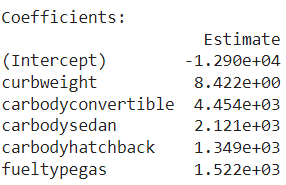

**price = 8.422e+00 * curbweight + 4.454e+03 * carbodycovertible + 2.121e+03 * carbodysedan + 1.349e+03 * carbodyhatchback + 1.522e+03 * fueltypegas - 1.290e+04**

**covered 90% of the models except bayesian networks and causal inference because I didnot find the scope to utilise them in the project.**

# THANKYOU